<a href="https://colab.research.google.com/github/parthsavaliya01/Auto-email-sender/blob/main/IndiGo_Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Classification Airline Passenger Referral Prediction

##### **Project Type**    - Classification
##### **Name**    - Chandan Aruk

# **Project Summary -**

In the competitive airline industry, customer satisfaction and loyalty are crucial. IndiGo, a leading low-cost carrier, seeks to strengthen its market position by understanding what drives passenger referrals—recommendations from satisfied customers that influence brand reputation and new customer acquisition.

This project analyzes customer reviews from 2006 to 2019 to build a machine learning model that predicts the likelihood of a passenger recommending IndiGo. These reviews reflect customer perceptions across key service areas like comfort, in-flight service, value for money, and overall experience.

By leveraging this model, IndiGo can:

1. **Enhance Customer Experience** – Identify and improve the service aspects that most influence referrals, ensuring customer expectations are met or exceeded.

2. **Implement Targeted Improvements** – Focus on specific weak points in the customer journey rather than applying broad, unfocused changes.

3. **Optimize Marketing Strategies** – Use insights into referral behavior to tailor marketing efforts, emphasizing strengths that matter most to customers.

4. **Gain a Competitive Edge** – Continuously refine services based on real feedback, helping IndiGo stand out in a crowded market.

In summary, this project transforms historical customer feedback into actionable insights. It enables IndiGo to deliver better experiences, foster customer loyalty, and drive growth through data-driven decision-making and predictive analytics.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Customer referrals are a key indicator of satisfaction and trust in the airline industry. For IndiGo, understanding what drives passengers to recommend its services is essential for improving customer experience and staying competitive.

While customer reviews from 2006 to 2019 contain valuable feedback on areas like comfort, service quality, and value for money, this information is unstructured and difficult to analyze manually.

The problem is to build a machine learning model that can **predict whether a customer will recommend IndiGo** based on their review and ratings. This model will help identify the most influential factors behind customer referrals.

Solving this problem will enable IndiGo to:

* Understand what drives positive customer sentiment.
* Make targeted improvements in services that matter most to passengers.
* Design more effective marketing strategies based on referral potential.
* Ultimately, increase customer loyalty and boost long-term growth.




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install category_encoders

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, randint

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import category_encoders as ce
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

sns.set_style('darkgrid')


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df1 = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df1.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df1.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('Duplicate Values',df1.duplicated().sum())

Duplicate Values 70711


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df1.isnull().sum()

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


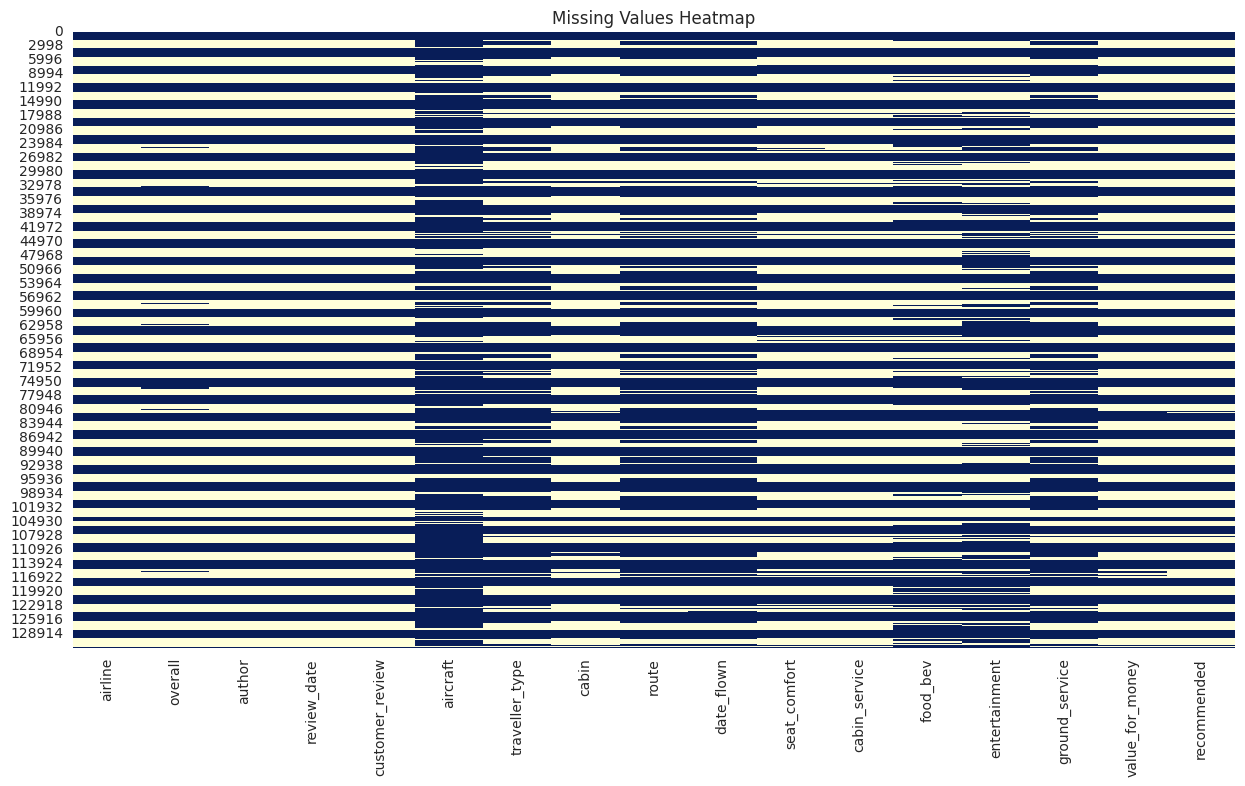

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
sns.heatmap(df1.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

> **Dataset Overview**

The dataset used in this project contains airline reviews collected from 2006 to 2019 for major airlines operating worldwide. These reviews include both quantitative ratings and qualitative feedback from passengers, offering rich insights into customer satisfaction across various aspects of the flight experience.

The dataset comprises **131,895 rows** and **17 features**, each capturing a specific element of the travel and review experience and reflects a wide range of customer journeys, traveler types, and airline services.


> **Data Quality Note:**

A notable characteristic of the dataset is its formatting irregularity: the data rows alternate between empty and filled entries. Specifically, every second row is blank, which may result from the web scraping method used. This pattern necessitates preprocessing before model training, including removing empty rows and handling missing values appropriately.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


### Variables Description

> **Feature Descriptions:**

* **airline** – Name of the airline reviewed
* **overall** – Overall rating score given by the customer
* **author** – Reviewer’s name or user information
* **review\_date** – Date when the review was posted
* **customer\_review** – The full text of the passenger’s review
* **aircraft** – Aircraft model used on the route
* **traveller\_type** – Classification of the traveler (e.g., Solo, Business, Couple)
* **cabin** – Class of travel (Economy, Premium Economy, Business, First)
* **route** – Route or flight path taken
* **date\_flown** – The actual date of travel
* **seat\_comfort** – Rating for seat comfort
* **cabin\_service** – Rating for cabin crew service
* **food\_bev** – Rating for food and beverages
* **entertainment** – Rating for in-flight entertainment
* **ground\_service** – Rating for services at the airport or before boarding
* **value\_for\_money** – Perceived value of the service provided
* **recommended** – Whether the passenger would recommend the airline (Yes/No)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df1.columns:
  print("No. of unique values in ",i,"is",df1[i].nunique())

No. of unique values in  airline is 81
No. of unique values in  overall is 10
No. of unique values in  author is 44069
No. of unique values in  review_date is 3015
No. of unique values in  customer_review is 61172
No. of unique values in  aircraft is 2088
No. of unique values in  traveller_type is 4
No. of unique values in  cabin is 4
No. of unique values in  route is 24549
No. of unique values in  date_flown is 63
No. of unique values in  seat_comfort is 5
No. of unique values in  cabin_service is 5
No. of unique values in  food_bev is 5
No. of unique values in  entertainment is 5
No. of unique values in  ground_service is 5
No. of unique values in  value_for_money is 5
No. of unique values in  recommended is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

* Handling Duplicates

In [ ]:
# Making a copy of dataset for safety purpose
df=df1.copy()

In [ ]:
# Drop all duplicated rows as there are many blank and duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
# After dropping all duplicated rows we are reseting our index.
df.reset_index(drop=True, inplace=True)

In [ ]:
# Checking shape of dataset
df.shape

(61184, 17)

* Handling Null Values

In [ ]:
# Checking for null values and sort in ascending order
print(df.isnull().sum().sort_values(ascending=False))

aircraft           42696
ground_service     24015
date_flown         23750
route              23671
traveller_type     23644
entertainment      20954
food_bev           12843
seat_comfort        4973
cabin_service       4944
cabin               2479
value_for_money     1857
overall             1783
recommended         1423
airline                1
review_date            1
customer_review        1
author                 1
dtype: int64


In [ ]:
# Calculating the percentage of missing (null) values in each column
null_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
null_percentage = null_percentage.round(2)
print(null_percentage)

aircraft           69.78
ground_service     39.25
date_flown         38.82
route              38.69
traveller_type     38.64
entertainment      34.25
food_bev           20.99
seat_comfort        8.13
cabin_service       8.08
cabin               4.05
value_for_money     3.04
overall             2.91
recommended         2.33
airline             0.00
review_date         0.00
customer_review     0.00
author              0.00
dtype: float64


In [ ]:
# In this we have too many null values so we dropped it and it can't be filled also
df.drop(columns=['aircraft'],axis=1,inplace=True)

In [ ]:
# Drop unwanted columns that is not used for our analysis
df.drop(columns=(['author','customer_review','route']),axis=1,inplace=True)

In [ ]:
# Here we are droping nan values rows for these two columns named ground_service and entertainment.
df.dropna(subset=(['ground_service','entertainment']),inplace=True)

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

food_bev           782
cabin               13
date_flown          10
traveller_type       2
overall              1
seat_comfort         1
cabin_service        1
review_date          0
airline              0
entertainment        0
ground_service       0
value_for_money      0
recommended          0
dtype: int64


In [ ]:
# Filling the null vales with mean of their rating
df['food_bev'].fillna(df['food_bev'].mean(),inplace=True)

In [ ]:
#Drop all null values in our whole dataset
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

airline            0
overall            0
review_date        0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64


In [ ]:
# Check for shape after cleaning or dataset
df.shape

(23606, 13)

In [ ]:
df.head()

,airline,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
3,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
4,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
5,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
# First row is all null values so after we dropped it our index starts from 1 so we are resetting or index
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,airline,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,8th May 2019,Business,Economy Class,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,7th May 2019,Family Leisure,Economy Class,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,7th May 2019,Business,Economy Class,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,6th May 2019,Solo Leisure,Economy Class,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


* Type Conversion

In [ ]:
# Checking for Datatypes of columns in dataset
print(df.dtypes)

airline             object
overall            float64
review_date         object
traveller_type      object
cabin               object
date_flown          object
seat_comfort       float64
cabin_service      float64
food_bev           float64
entertainment      float64
ground_service     float64
value_for_money    float64
recommended         object
dtype: object


In [ ]:
# we can see there are many variables having not appropriate datatypes so we changed them to their suitable datatypes below.

d_type={'overall':'int8','review_date':'datetime64[ns]','seat_comfort':'int8','cabin_service':'int8','food_bev':'int8','entertainment':'int8',
        'ground_service':'int8',
        'value_for_money':'int8'}
for i,j in d_type.items():
  df[i]=df[i].astype(j)

In [ ]:
# Here converted date_flown column in a proper date format by removing timestamp and changed to Datetime format.
df['date_flown']=pd.to_datetime(df['date_flown'], errors='coerce')

In [ ]:
# Cross check that datatype is changed or not.
print(df.dtypes)

airline                    object
overall                      int8
review_date        datetime64[ns]
traveller_type             object
cabin                      object
date_flown         datetime64[ns]
seat_comfort                 int8
cabin_service                int8
food_bev                     int8
entertainment                int8
ground_service               int8
value_for_money              int8
recommended                object
dtype: object


* Column Renaming For Better Understanding

In [ ]:
rename_col={'overall':'overall_rating','date_flown':'departure_date'}
df.rename(columns=rename_col,inplace=True)

In [ ]:
df.head()

,airline,overall_rating,review_date,traveller_type,cabin,departure_date,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7,2019-05-08,Business,Economy Class,2019-05-01,4,5,4,4,2,4,yes
1,Turkish Airlines,2,2019-05-07,Family Leisure,Economy Class,2019-05-01,4,1,1,1,1,1,no
2,Turkish Airlines,3,2019-05-07,Business,Economy Class,2019-05-01,1,4,1,3,1,2,no
3,Turkish Airlines,10,2019-05-06,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes
4,Turkish Airlines,1,2019-05-06,Solo Leisure,Economy Class,2019-05-01,1,1,1,1,1,1,no


### What all manipulations have you done and insights you found?

* **Handling Missing Values:**
  The dataset contained a significant number of missing values, particularly due to its structure, where every alternate row was empty. These blank rows were removed entirely.
  Additionally, missing values in specific columns (e.g., `aircraft`, `entertainment`, `food_bev`) were handled using appropriate strategies.

* **Date Formatting:**
  Columns such as `review_date` and `date_flown` were initially in object format. These were converted to `datetime` to facilitate time-based analysis. Additionally, the `date_flown` column contained timestamps, which were removed to standardize the date format.

* **Column Renaming:**
  For improved clarity and semantic understanding, `overall` was renamed to `overall_rating`, and `date_flown` was renamed to `departure_date`.

* **Data Type Conversion:**
  Several rating-related columns were originally stored as floats, despite representing whole-number scores (e.g., 1 to 5). These were converted to integers for consistency and easier interpretation.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Top 10 Airlines based on highest trips (Bar Chart)

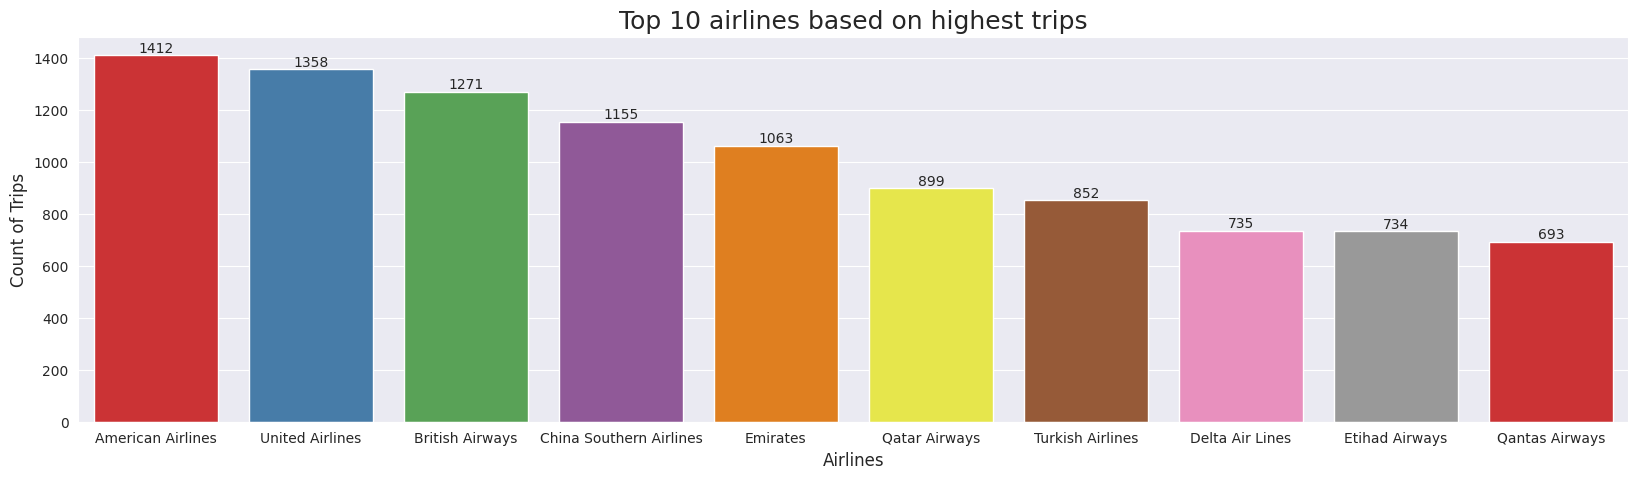

In [ ]:
# Chart - 1 visualization code

air_cnt = df['airline'].value_counts().sort_values(ascending=False).head(10).reset_index()
air_cnt.columns = ['airline_name', 'trip_count']

plt.figure(figsize = (20,5))
palette = sns.color_palette("Set1", 10)
ax = sns.barplot(x='airline_name', y='trip_count', data=air_cnt, palette=palette)
plt.xlabel('Airlines', fontsize=12)
plt.ylabel('Count of Trips', fontsize=12)
plt.title('Top 10 airlines based on highest trips', fontsize=18)

# Adding data labels on top of bars
for num in ax.containers:
    ax.bar_label(num)

plt.show()

##### 1. Why did you pick the specific chart?

**A bar graph is well-suited for visualizing categorical data alongside numerical values. In this case, it effectively illustrates the number of trips associated with each airline, providing a clear comparison across different carriers.**

##### 2. What is/are the insight(s) found from the chart?

**We displayed the top 10 airlines based on the number of trips. From the chart, we can see that *American Airlines* has the highest number of trips with 1,412, followed by *United Airlines* with 1,358, and *British Airways* with 1,271.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**It's important to look at what people are saying in their reviews in top airlines. Understanding what customers like—such as good service, on-time flights, or other positives—can help airlines keep doing those things well. At the same time, noticing common complaints can help airlines fix problems and make the travel experience better for everyone.**

#### Chart - 2 - Most Popular Cabin Type (Bar Chart)

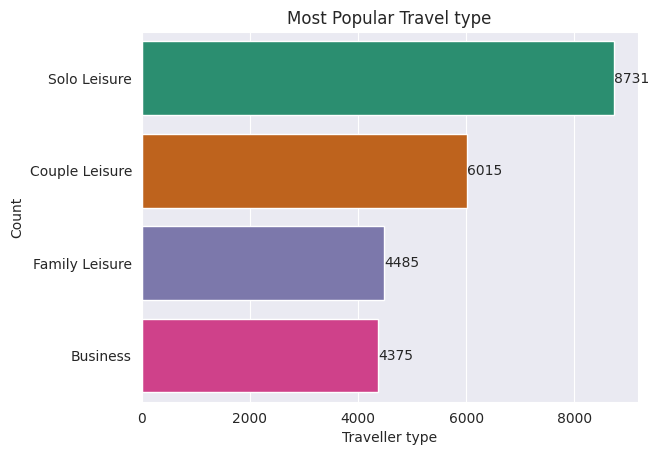

In [ ]:
# Chart - 2 visualization code

most_trav = df["traveller_type"].value_counts().reset_index()
ax = sns.barplot(x=most_trav['count'],y = most_trav['traveller_type'] ,palette = 'Dark2')
plt.ylabel('Count')
plt.xlabel('Traveller type')
plt.title('Most Popular Travel type')
for num in ax.containers:
  ax.bar_label(num)
plt.show()

##### 1. Why did you pick the specific chart?

**A bar graph is well-suited for visualizing categorical data alongside numerical values. In this case, it effectively illustrates the number of trips associated with each airline, providing a clear comparison across different carriers.**

##### 2. What is/are the insight(s) found from the chart?

***Solo Leisure* is the most preffered travel type by passengers while *Bussiness* is the lowest travel_type.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Knowing that solo leisure travel is the most common helps the airline focus its marketing on this group. Special offers, ads, and loyalty programs can be made to attract and keep these travelers, which can help bring in more customers and build loyalty.**

#### Chart - 3 - Number of reviews over months (Bar Chart + Line Chart)

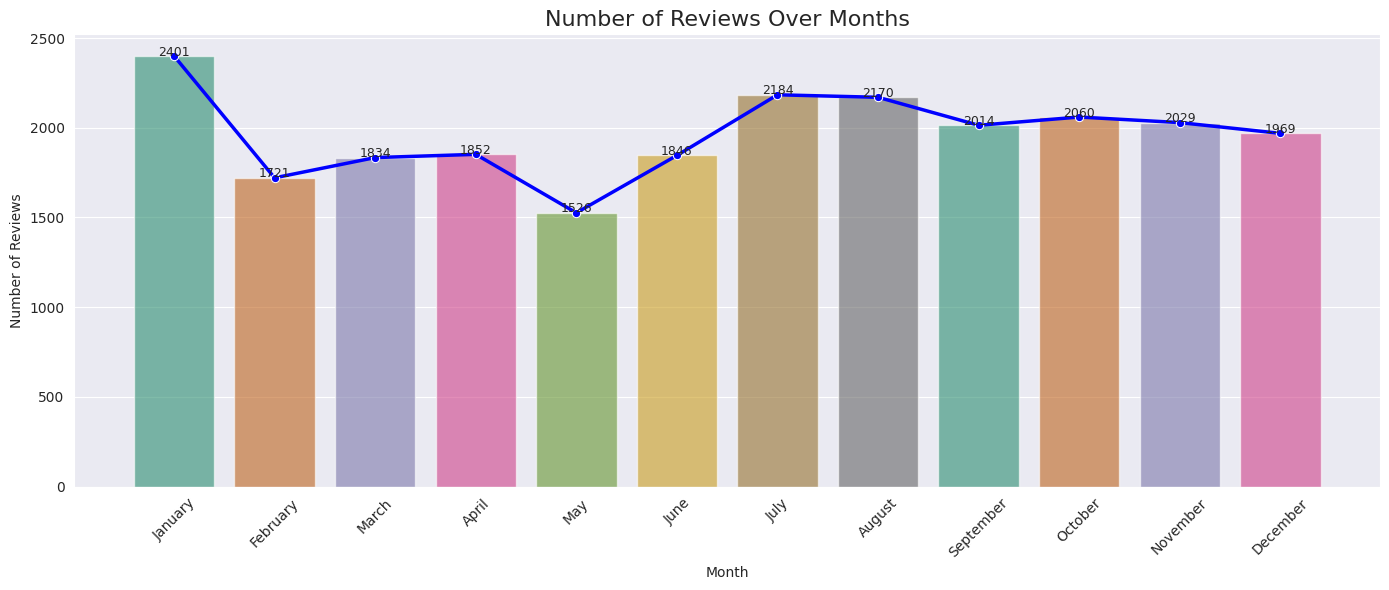

In [ ]:
# Chart - 3 visualization code
# Prepare the data
df['month_name'] = df['review_date'].dt.strftime('%B')
df['month'] = df['review_date'].dt.month

# Count reviews per month
df2 = df[['month_name', 'month']].value_counts().reset_index(name='count')
df2 = df2.sort_values(by='month')

# Plotting both bar and line chart together
plt.figure(figsize=(14, 6))
plt.title('Number of Reviews Over Months', fontsize=16)

# Bar chart
sns.barplot(data=df2, x='month_name', y='count', palette='Dark2', alpha=0.6)

# Line chart
sns.lineplot(data=df2, x='month_name', y='count', marker='o', color='blue', linewidth=2.5)

# Annotate line points
for i in range(len(df2)):
    plt.text(x=i, y=df2['count'].iloc[i] + 2, s=df2['count'].iloc[i], ha='center', fontsize=9)

plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**I chose the bar-line combo chart because it clearly shows both the total number of reviews per month (with bars) and the overall trend over time (with the line). This dual visualization makes it easier to compare individual months while also understanding the bigger picture of how reviews change over time.**

##### 2. What is/are the insight(s) found from the chart?

**From the chart, we can see that the month of January has the highest number of reviews, followed by July and August. On the other hand, May has the fewest reviews. One reason for the high number in January could be that it's a popular holiday or vacation month, so more people are traveling. It’s also possible that with more passengers, the staff may face challenges in managing services, which could lead to more reviews—both positive and negative.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**For holiday months if we are having more passenger traffic so we should employ the temporary staff to not spoil our services and management if the traffic is the reason.**

#### Chart - 4 - Top 10 Airlines with Highest Avg. Rating of value for money (Bar Chart)

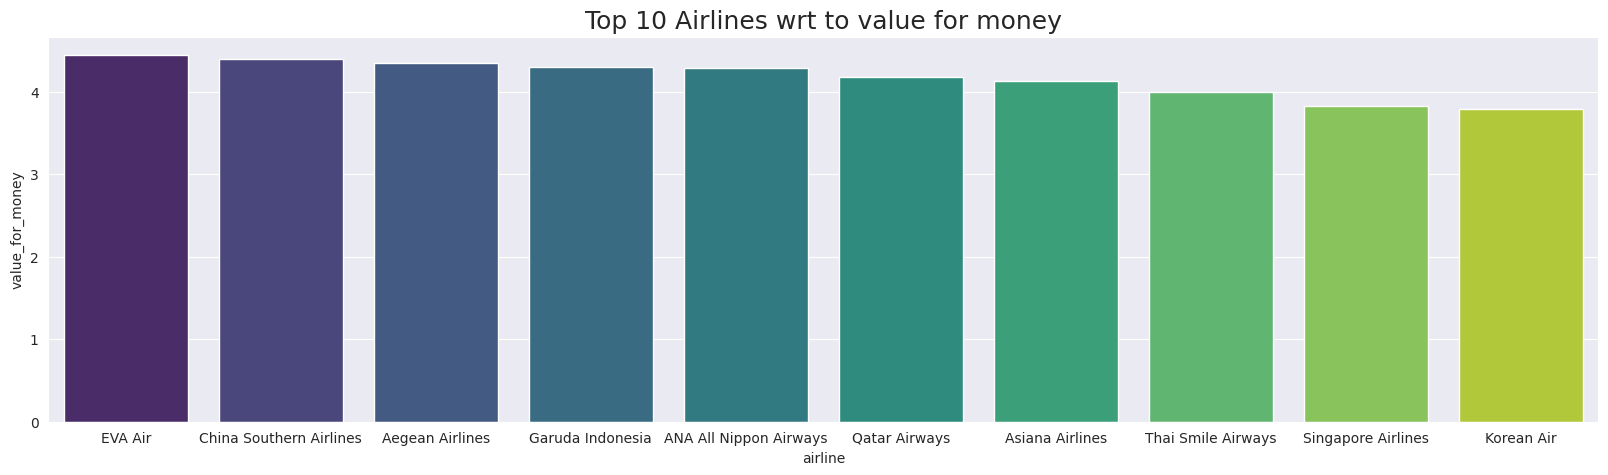

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize= (20,5))
val = df.groupby(df['airline'])['value_for_money'].mean().sort_values(ascending = False).head(10).reset_index()
ax = sns.barplot(x=val['airline'],y = val['value_for_money'] ,palette = 'viridis')

plt.title('Top 10 Airlines wrt to value for money',fontsize = 18)
plt.show()

##### 1. Why did you pick the specific chart?

**A bar graph is well-suited for visualizing categorical data alongside numerical values. In this case, it effectively illustrates the number of trips associated with each airline, providing a clear comparison across different carriers.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that *EVA Air* is the highest rated followed by *China Southern Airlines* and *Aegean Airlines*  for value for money.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Based on the above insightes EVA Air can offer loyalty programs or incentives for frequent flyers to encourage repeat business and enhance customer loyalty.**

#### Chart - 5 - Distribution of diffrent cabin classes preffered by passengers (Pie Chart)

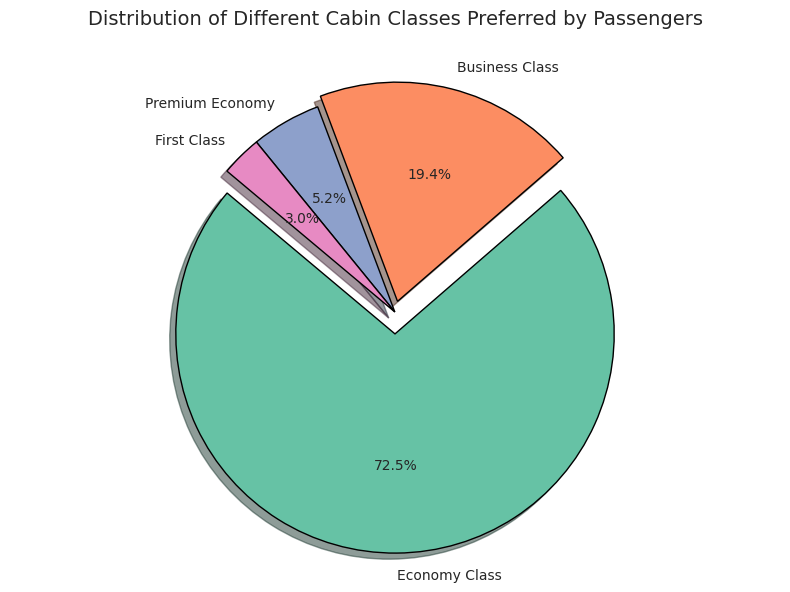

In [ ]:
# Chart - 5 visualization code

# Count occurrences of each cabin class
cabin_counts = df['cabin'].value_counts().reset_index()
cabin_counts.columns = ['Cabin Class', 'Count']

# Calculate explode values: highlight top 1–2 classes if needed
explode_values = [0.1 if i == 0 else 0.05 if i == 1 else 0 for i in range(len(cabin_counts))]

# Define custom colors (as many as you have categories)
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    cabin_counts['Count'],
    labels=cabin_counts['Cabin Class'],
    autopct='%1.1f%%',
    startangle=140,
    explode=explode_values,
    shadow=True,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'black'},
    colors=colors[:len(cabin_counts)]
)

# Add title
plt.title('Distribution of Different Cabin Classes Preferred by Passengers', fontsize=14, y=1.05)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**A pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions. It's primarily used to show the relationship of parts to a whole.**

##### 2. What is/are the insight(s) found from the chart?

**The chart shows that Economy Class makes up the largest portion of travelers at 72.5%, followed by Business Class at 19.4%. Premium Economy (5.2%) and First Class (3.0%) make up a much smaller share. This suggests that most people were traveling in Economy Class.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Since Economy Class is the most popular, airlines can focus on improving services that matter most to these passengers. They can also create targeted promotions, loyalty programs, and ads to attract and keep Economy Class travelers.**

#### Chart - 6 - Top Rated Airlines (Bar Chart)

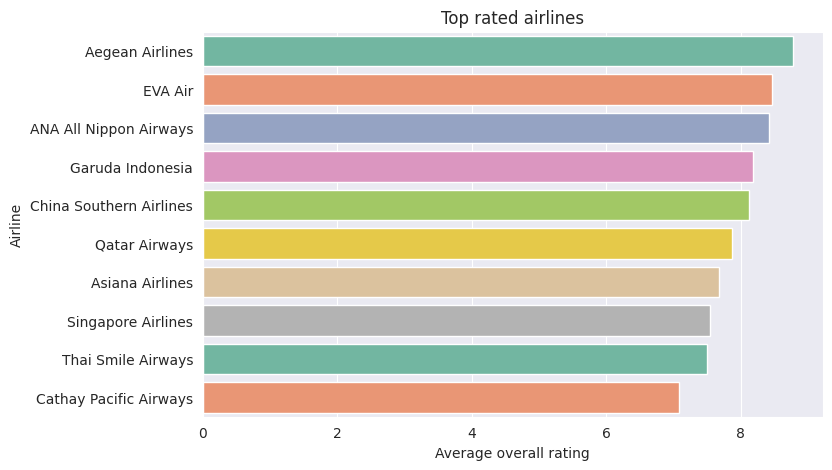

In [ ]:
# Chart - 6 visualization code

plt.figure(figsize= (8,5))
overall = df.groupby(df['airline'])['overall_rating'].mean().sort_values(ascending = False).head(10).reset_index()
ax = sns.barplot(y=overall['airline'],x = overall['overall_rating'],palette ="Set2" )
plt.xlabel('Average overall rating')
plt.ylabel('Airline')
plt.title('Top rated airlines')

plt.show()

##### 1. Why did you pick the specific chart?

**We used a horizontal bar chart to compare different airlines based on their average overall ratings.**

##### 2. What is/are the insight(s) found from the chart?

**From this chart we can see Aegean airlines is highest overall rating followed by EVA airlines and ANA all Nippon Airways while Cathay Pecific airways has the lowest rating .**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Aegean Airlines, EVA Air, and ANA All Nippon Airways should keep focusing on great service to maintain their high ratings. This can include better in-flight features, on-time flights, and friendly customer service. On the other hand, Cathay Pacific Airways, which has a lower rating, can work on improving by training staff and focusing on a better overall customer experience.**

#### Chart - 7 - Distribution of overall rating (Histogram)

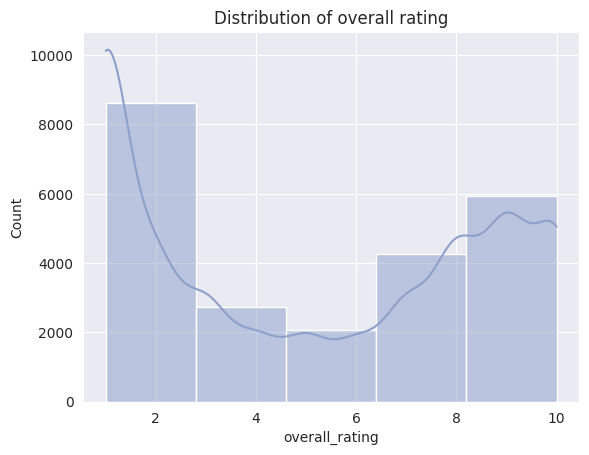

In [ ]:
# Chart - 7 visualization code
sns.histplot(df['overall_rating'], kde = True,bins =5,color='#8da0cb')
plt.title('Distribution of overall rating')
plt.show()

##### 1. Why did you pick the specific chart?

**I choose Histogram for distribution of Overall rating. Histogram is perfect for displaying distribution.**

##### 2. What is/are the insight(s) found from the chart?

**We can conclude that most people gave ratings between either 1–2 or 8–10. This suggests that passengers tend to have either a very good or a very bad experience with the airline, with fewer neutral opinions in between.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Based on the insights above, airlines should focus on fixing the issues that lead to very low ratings, such as poor customer service, delays, or uncomfortable seating. They can also engage with passengers who gave very high or very low ratings to gather useful feedback. This helps them understand what needs improvement and what they are doing well.**

#### Chart - 8 - Overall Rating vs Cabin Type (Grouped Bar Chart)

<Axes: title={'center': 'Overall rating vs cabin type'}, xlabel='cabin', ylabel='overall_rating'>

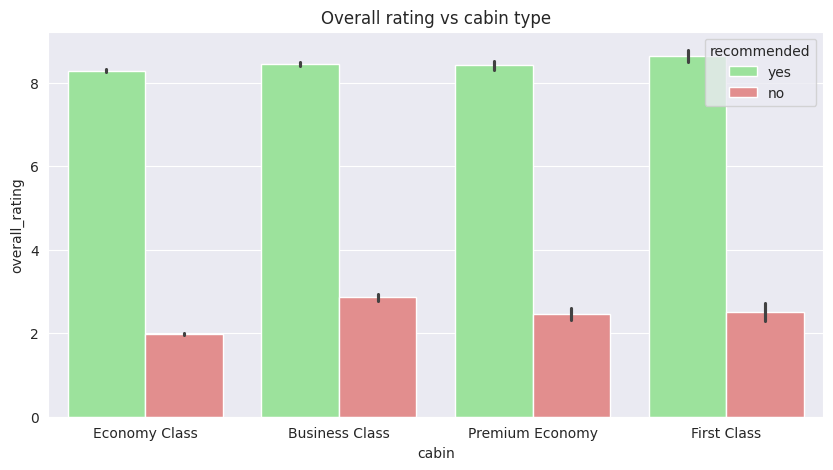

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,5))
plt.title('Overall rating vs cabin type')
sns.barplot(x = df.cabin, y = df.overall_rating, hue = df['recommended'], palette= ['lightgreen','lightcoral'])

##### 1. Why did you pick the specific chart?

**Since we are comparing a categorical variable with a discrete numerical value, a side-by-side bar chart is the most suitable choice for this visualization.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that for all cabin types, the overall rating is above 8 when the customer recommends the airline. On the other hand, when the answer is 'No', the overall rating is much lower—around 2 in Economy and about 3 in other classes. This shows that recommendation is closely linked to the overall experience, and the cabin type doesn't make a big difference in this pattern.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**We can say from above insights that if a person give overall rating more than 8 then its 99% sure that he is gonna recommend the airline to others by the help of rating we can request our customer to share their opinions on airline service on some platform for recommendation, while if person is not satisfied we will try to resolve their issue with best possible solution.**

#### Chart - 9 - Distribution of diffrent types of ratings (Voilin Plot)

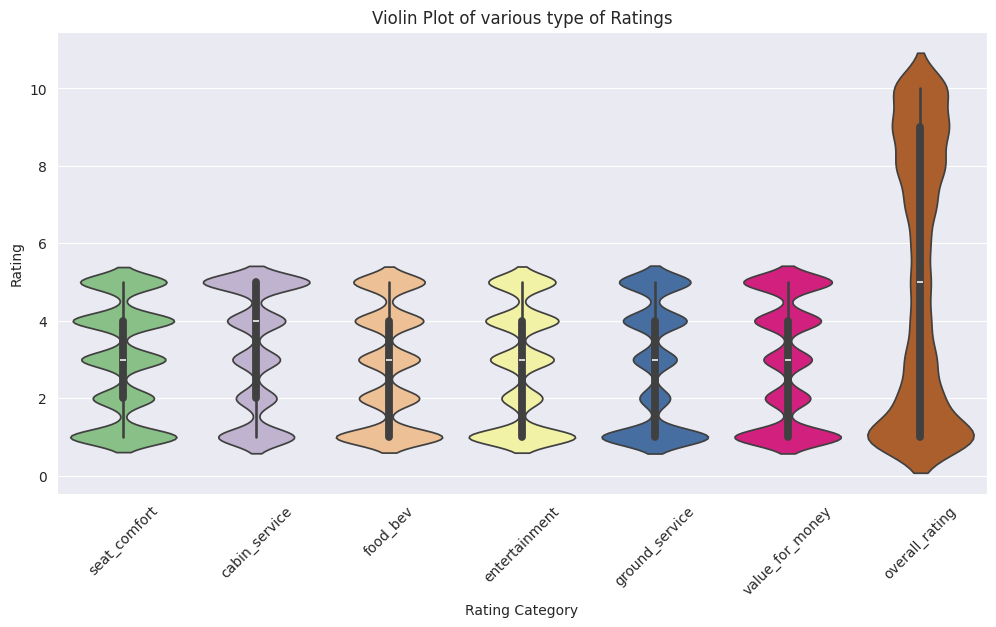

In [ ]:
# Chart - 9 visualization code

columns = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money','overall_rating']

df_melted = df.melt(value_vars=columns, var_name='Rating Category', value_name='Rating')

# violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating Category', y='Rating', data=df_melted,palette='Accent')
plt.title('Violin Plot of various type of Ratings')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

**We chose a violin chart because it's useful for comparing how data is distributed across different groups. It not only shows the average rating for each category but also gives a clear view of how the ratings are spread out.**

##### 2. What is/are the insight(s) found from the chart?

**We can see that most of the rating variables are either 1 or between 4 and 5. The overall rating ranges from 1 to 10, but most ratings tend to fall either on the lower end or the higher end, with fewer in the middle.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Airlines can use this insight to adjust pricing strategies.If customers rate the value for money lower, airlines can consider offering more competitive pricing or value-added services.hence improving specific aspects of service that are consistently rated lower can enhance the airline's brand reputation and differentiate it from competitors.**

#### Chart - 10 -  Comparing Cabin classes based on food_bev and entertainment ratings (Grouped Bar Chart)

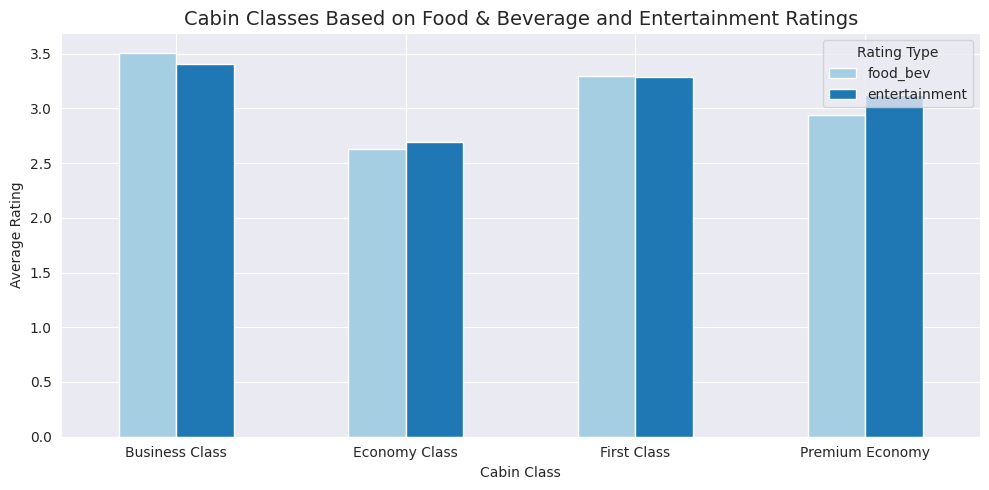

In [ ]:
# Chart - 10 visualization code

# Prepare the data
eda_4 = df.groupby('cabin')[['food_bev', 'entertainment']].mean().reset_index()
plt.rcParams['figure.figsize'] = (10, 5)

# Choose a clean and modern color palette
colors = sns.color_palette("Paired", 2)

# Plot with better colors
ax = eda_4.plot(
    x="cabin",
    y=["food_bev", "entertainment"],
    kind="bar",
    color=colors
)

# Styling
plt.title('Cabin Classes Based on Food & Beverage and Entertainment Ratings', fontsize=14)
plt.ylabel('Average Rating')
plt.xlabel('Cabin Class')
plt.xticks(rotation=0)
plt.legend(title="Rating Type")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**A side-by-side bar chart is the best choice for comparing different cabin classes in terms of food & beverages and entertainment.**

##### 2. What is/are the insight(s) found from the chart?

**We can conclude that there isn’t much difference in food & beverage and entertainment ratings for Economy and First Class. However, in Premium Economy, entertainment is rated higher than food & beverage, while in Business Class, food & beverage receives higher ratings than entertainment.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Knowing that passengers in Premium Economy and Business Class have different preferences for entertainment and food & beverages helps the airline improve each service based on class. This could mean offering better food options, upgrading entertainment systems, or adding new features to meet passenger expectations.**

#### Chart - 11 - Cabin Class Recommendation based on service ratings (Boxplot)

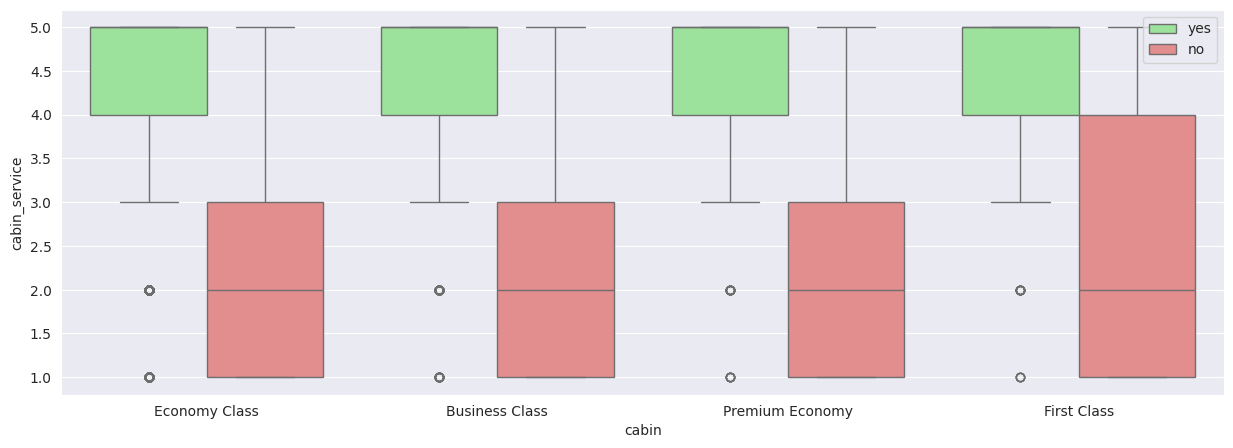

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(15,5))
sns.boxplot(x=df['cabin'], y=df['cabin_service'], hue = df['recommended'],palette=['lightgreen','lightcoral'] )
plt.legend(loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

**We picked this type of Boxplot to show rating comparison between diffrent cabin classes.**

##### 2. What is/are the insight(s) found from the chart?

**We can see for every cabin class if the service rating is more then 3 then passenger is more likely to recommend that airline to others.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By improving service quality across all cabin classes to ensure ratings stay above 3, airlines can boost overall customer satisfaction. This can lead to more positive recommendations and increased customer loyalty.

However, if service ratings in any cabin class consistently fall below 3, it can have a negative impact—resulting in poor word-of-mouth, lower satisfaction, and fewer recommendations. Over time, this could lead to a loss of customers and reduced revenue. **bold text**

#### Chart - 12 - Correlation Heatmap

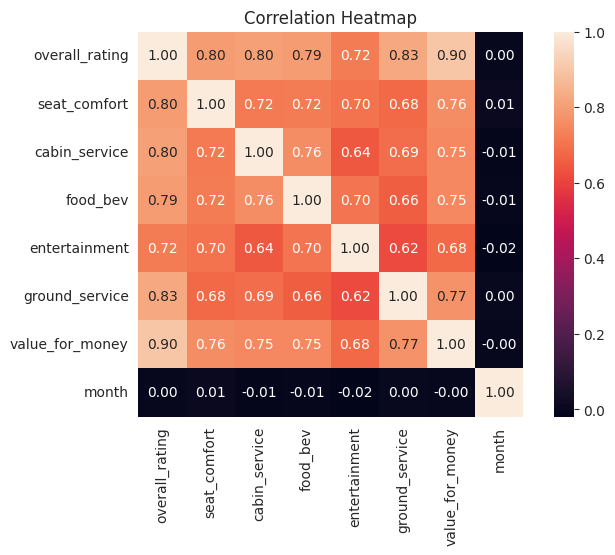

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,5))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True,cmap="rocket")
plt.show()

##### 1. Why did you pick the specific chart?

**This graph is especially powerful because it shows the relationships between all the columns, allowing us to observe how different variables interact with one another.**

##### 2. What is/are the insight(s) found from the chart?

**In the graph, positive values show a direct relationship between two variables—meaning as one increases, the other tends to increase as well. Negative values indicate an inverse relationship—when one goes up, the other tends to go down. The larger the value (positive or negative), the stronger the relationship between the variables. A value of 1 means a perfect positive correlation. For example, if you're looking at a heatmap and see a '1' where value_for_money is compared with itself, it simply means the correlation is perfect—as expected, since any variable is always perfectly correlated with itself.**

#### Chart - 13 - Pair Plot

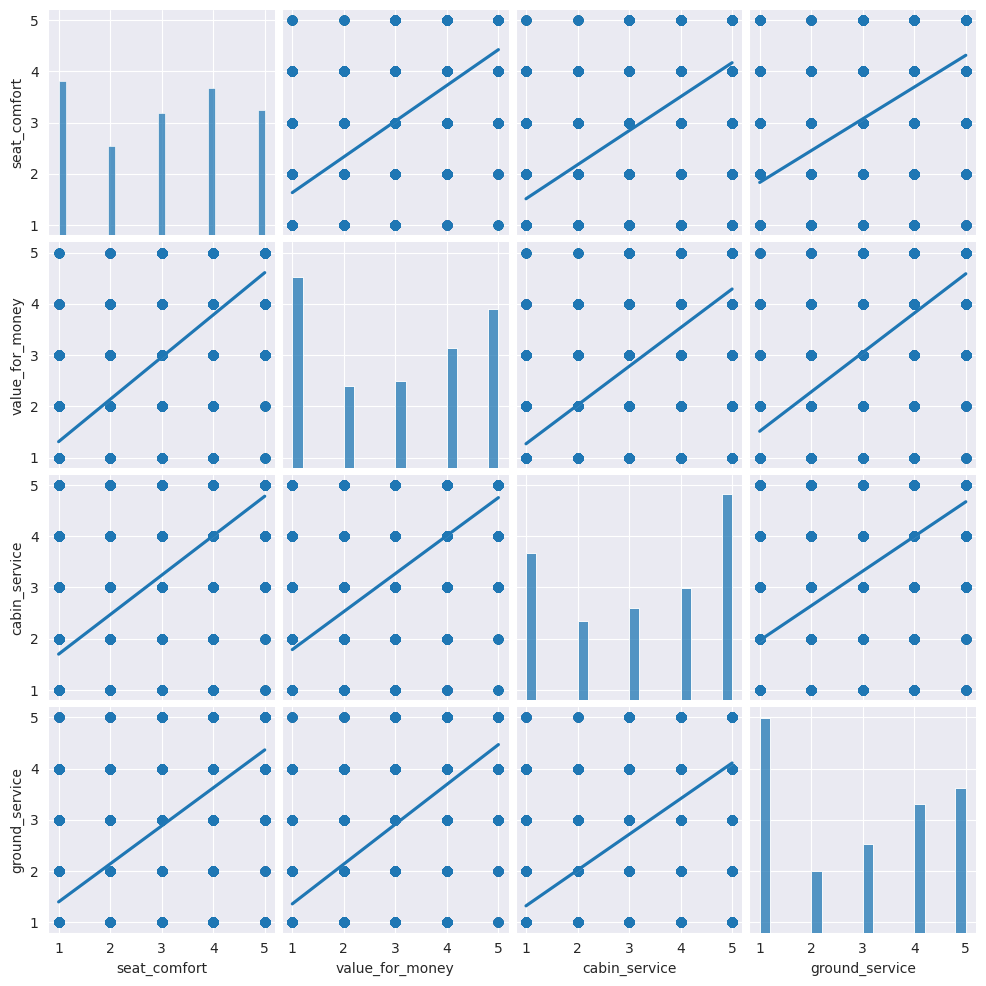

In [ ]:
# Chart - 13 visualization code
column_name = [ 'seat_comfort','value_for_money','cabin_service','ground_service']
sns.pairplot(df[column_name],kind = 'reg')
plt.show()

##### 1. Why did you pick the specific chart?

**Here we wanted to have a pairwise visualisation of all the columns in the dataset , hence used pairplot.**

##### 2. What is/are the insight(s) found from the chart?

**Since our dataset contains discrete values, the distribution isn’t perfectly smooth. However, we can still observe a positive relationship between all the rating-related columns.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Is There a Significant Difference in Ratings Between Two Different Airlines?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): The overall ratings for two specific airlines are equal.


* Alternative Hypothesis (H1): The overall ratings for two specific airlines are not equal.

#### 2. Perform an appropriate statistical test.

In [ ]:
def compare_airlines_ratings(df, airline1, airline2, column='overall_rating', alpha=0.05):
    # Extract ratings for both airlines
    ratings1 = df[df['airline'] == airline1][column].dropna()
    ratings2 = df[df['airline'] == airline2][column].dropna()

    # Calculate means and standard deviations
    mean1, mean2 = ratings1.mean(), ratings2.mean()
    std1, std2 = ratings1.std(), ratings2.std()

    # Sample sizes
    n1, n2 = len(ratings1), len(ratings2)

    # Standard errors
    se1, se2 = std1 / np.sqrt(n1), std2 / np.sqrt(n2)
    standard_error = np.sqrt(se1**2 + se2**2)

    # T-statistic
    t_stat = (mean1 - mean2) / standard_error

    # Degrees of freedom
    dof = n1 + n2 - 2

    # Critical value (optional)
    critical_value = stats.t.ppf(1.0 - alpha, dof)

    # Two-tailed p-value
    p_value = (1 - stats.t.cdf(abs(t_stat), dof)) * 2

    # Print summary
    print(f"\n🔍 Comparing '{airline1}' vs '{airline2}' on '{column}' ratings:")
    print(f"  - t-statistic: {t_stat:.4f}")
    print(f"  - p-value: {p_value:.5f}")

    if p_value < alpha:
        print(f"\n✅ Reject the null hypothesis (p < {alpha}). There is a significant difference.")
    else:
        print(f"\n❌ Fail to reject the null hypothesis (p ≥ {alpha}). No significant difference.")

In [ ]:
compare_airlines_ratings(df, 'Qatar Airways', 'EVA Air')


🔍 Comparing 'Qatar Airways' vs 'EVA Air' on 'overall_rating' ratings:
  - t-statistic: -3.7432
  - p-value: 0.00019

✅ Reject the null hypothesis (p < 0.05). There is a significant difference.


##### Which statistical test have you done to obtain P-Value?

I performed T-Test for this hypothesis testing to obtain P-value.

##### Why did you choose the specific statistical test?

**We chose the independent two-sample t-test because we are comparing the mean overall ratings between two independent groups — passengers of *Qatar Airways* vs *EVA Air*. This test helps determine if the difference in average ratings is statistically significant or likely due to random chance. It's appropriate when:**

* The data is approximately normally distributed.
* The two groups are independent.
* We are testing the difference between two means.


### Hypothetical Statement - 2

Does Traveller Type Influence Recommendation Behavior?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): There is no association between the traveller type and the likelihood of recommending the airline.


* Alternative Hypothesis (H1): There is an association between the traveller type and the likelihood of recommending the airline.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define significance level
alpha = 0.05

# Create a contingency table of traveller type vs recommendation
contingency_table = pd.crosstab(df['traveller_type'], df['recommended'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print test results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:}")
print(f"Degrees of freedom: {dof}\n")

# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant association between traveller type and likelihood of recommending the airline.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant association between traveller type and likelihood of recommending the airline.")

Chi-square statistic: 304.73
P-value: 9.424196343911983e-66
Degrees of freedom: 3

Reject the null hypothesis.
There is a significant association between traveller type and likelihood of recommending the airline.


##### Which statistical test have you done to obtain P-Value?

I performed Chi-square Test for this hypothesis testing to obtain P-value.

##### Why did you choose the specific statistical test?

A Chi-square test of independence is used to determine whether there is a significant relationship between traveller type and recommendation status.

### Hypothetical Statement - 3

Do Seat Comfort Ratings Differ by Cabin Class?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): The seat comfort ratings are the same across different cabin classes.


* Alternative Hypothesis (H1): There is a significant difference in seat comfort ratings among different cabin classes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


# Perform one-way ANOVA to test if seat comfort ratings differ across cabin classes
f_statistic, p_value = f_oneway(
    df['seat_comfort'][df['cabin'] == 'First Class'],
    df['seat_comfort'][df['cabin'] == 'Business Class'],
    df['seat_comfort'][df['cabin'] == 'Premium Economy'],
    df['seat_comfort'][df['cabin'] == 'Economy Class']
)

# Set the significance level
alpha = 0.05

# Display the results
print("\nANOVA Results: Seat Comfort Ratings by Cabin Class")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:}\n")

# Interpret the result
if p_value < alpha:
    print("→ Reject the null hypothesis: Significant difference in seat comfort ratings among cabin classes.")
else:
    print("→ Fail to reject the null hypothesis: No significant difference in seat comfort ratings among cabin classes.")



ANOVA Results: Seat Comfort Ratings by Cabin Class
F-statistic: 628.3599
P-value: 0.0

→ Reject the null hypothesis: Significant difference in seat comfort ratings among cabin classes.


##### Which statistical test have you done to obtain P-Value?

I performed One-way ANOVA Test for this hypothesis testing to obtain P-value.

##### Why did you choose the specific statistical test?

A one-way ANOVA test is used to compare the average seat comfort ratings across different cabin classes

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

* I have already handled the missing values in exploratory data analysis.

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

airline            0
overall_rating     0
review_date        0
traveller_type     0
cabin              0
departure_date     0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
month_name         0
month              0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

* Since the dataset did not contain any outliers, no additional handling was required.

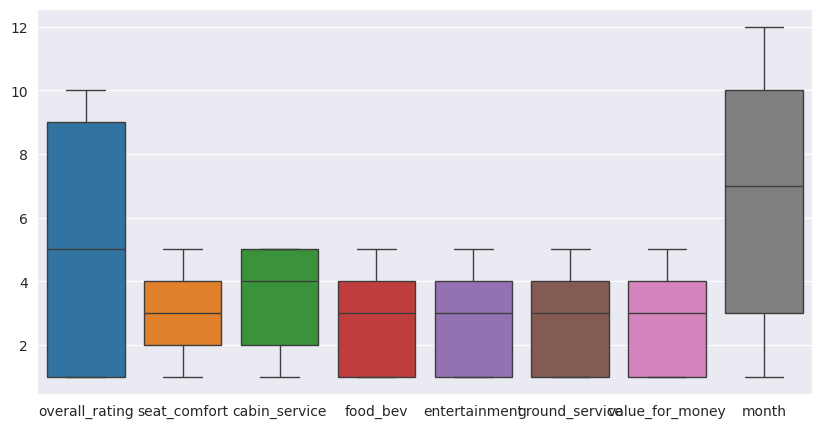

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
label_encode = LabelEncoder()
df['recommended'] = label_encode.fit_transform(df['recommended'])

In [ ]:
ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'cabin', 'mapping': {'Economy Class': 1, 'Business Class': 3,'Premium Economy' : 2,'First Class' :4}}])
df['cabin']= ordinal_encoder.fit_transform(df['cabin'])

In [ ]:
one_hot_encoder = ce.OneHotEncoder(cols=['traveller_type'])
df = one_hot_encoder.fit_transform(df)

#### What all categorical encoding techniques have you used & why did you use those techniques?



**Since machine learning models require numerical input, we needed to convert the categorical values in our dataset into numerical form. We used different encoding techniques based on the nature of each column:**

* **Traveller\_Type:** This column contains multiple distinct categories (e.g., Solo Leisure, Business, etc.). We applied **one-hot encoding** to convert each category into a separate binary column, as there is no natural order among the values.

* **Cabin:** The cabin classes (Economy, Premium Economy, Business, First Class) have a clear ranking. So, we used **ordinal encoding** to assign ordered numerical values based on class hierarchy (e.g., Economy = 1, Premium Economy = 2, and so on).

* **Recommended:** This column is binary with "Yes" and "No" values. We used **label encoding** to convert these into 1 and 0 respectively, making it suitable for binary classification.



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df.drop(columns = ['review_date','month_name','month','departure_date','airline'],inplace = True)

Columns like *review\_date* and *departure\_date* contain date/time information, which isn't directly useful for most machine learning models.

We also created *month* and *month\_name* columns for analysis purposes only, so they aren't needed for model training and were dropped.

Additionally, the *airline* column only contains the airline name, which doesn't contribute meaningful information for prediction, so it was also removed.



#### 2. Feature Selection

In [ ]:
df.corr()

,overall_rating,traveller_type_1,traveller_type_2,traveller_type_3,traveller_type_4,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
overall_rating,1.000000,-0.031337,-0.039396,0.109192,-0.057563,0.233264,0.795892,0.802345,0.793299,0.720355,0.826567,0.899440,0.899921
traveller_type_1,-0.031337,1.000000,-0.231001,-0.365419,-0.278908,0.201845,-0.010829,-0.023353,-0.028317,-0.037176,-0.023980,-0.047114,-0.024958
traveller_type_2,-0.039396,-0.231001,1.000000,-0.371047,-0.283203,-0.124594,-0.028523,-0.037813,-0.034492,-0.017355,-0.035149,-0.035384,-0.036072
traveller_type_3,0.109192,-0.365419,-0.371047,1.000000,-0.447998,-0.057788,0.094784,0.100652,0.096926,0.074056,0.092936,0.109364,0.111446
traveller_type_4,-0.057563,-0.278908,-0.283203,-0.447998,1.000000,-0.003797,-0.069675,-0.056646,-0.051080,-0.033271,-0.049936,-0.047296,-0.068740
cabin,0.233264,0.201845,-0.124594,-0.057788,-0.003797,1.000000,0.268436,0.218071,0.227989,0.189834,0.210488,0.186135,0.203489
seat_comfort,0.795892,-0.010829,-0.028523,0.094784,-0.069675,0.268436,1.000000,0.715203,0.720664,0.698042,0.678297,0.758516,0.725536
cabin_service,0.802345,-0.023353,-0.037813,0.100652,-0.056646,0.218071,0.715203,1.000000,0.759962,0.643760,0.686711,0.748290,0.742769
food_bev,0.793299,-0.028317,-0.034492,0.096926,-0.051080,0.227989,0.720664,0.759962,1.000000,0.704976,0.655019,0.747458,0.729327
entertainment,0.720355,-0.037176,-0.017355,0.074056,-0.033271,0.189834,0.698042,0.643760,0.704976,1.000000,0.615235,0.679103,0.648191


In [ ]:
X = df.drop(['recommended'],axis=1)
y = df['recommended']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True))


             Feature          Score
0     overall_rating  100535.140280
1    value_for_money   56434.657575
2     ground_service   31399.451221
3      cabin_service   29048.840941
4           food_bev   26823.110361
5       seat_comfort   26235.751841
6      entertainment   17103.198582
7              cabin    1019.607370
8   traveller_type_3     296.852367
9   traveller_type_4     112.061408
10  traveller_type_2      30.753898
11  traveller_type_1      14.712038


In [ ]:
# Select your features wisely to avoid overfitting
df[['overall_rating','seat_comfort','food_bev','cabin_service','entertainment','ground_service','value_for_money','recommended']].corr()

,overall_rating,seat_comfort,food_bev,cabin_service,entertainment,ground_service,value_for_money,recommended
overall_rating,1.000000,0.795892,0.793299,0.802345,0.720355,0.826567,0.899440,0.899921
seat_comfort,0.795892,1.000000,0.720664,0.715203,0.698042,0.678297,0.758516,0.725536
food_bev,0.793299,0.720664,1.000000,0.759962,0.704976,0.655019,0.747458,0.729327
cabin_service,0.802345,0.715203,0.759962,1.000000,0.643760,0.686711,0.748290,0.742769
entertainment,0.720355,0.698042,0.704976,0.643760,1.000000,0.615235,0.679103,0.648191
ground_service,0.826567,0.678297,0.655019,0.686711,0.615235,1.000000,0.772872,0.755555
value_for_money,0.899440,0.758516,0.747458,0.748290,0.679103,0.772872,1.000000,0.839698
recommended,0.899921,0.725536,0.729327,0.742769,0.648191,0.755555,0.839698,1.000000


In [ ]:
# Dropping the overall ratings because of data leakage
df.drop('overall_rating',axis = 1 ,inplace = True)

In [ ]:
selected_col = ['seat_comfort','food_bev','cabin_service','entertainment','ground_service','value_for_money']

##### What all feature selection methods have you used  and why?

Feature selection is the process of identifying and selecting the most relevant features (variables or predictors) to be used in building a machine learning model.

In our case, we used the filter method, which evaluates the relevance of features using statistical measures independent of the machine learning algorithm.

Specifically, we applied the correlation coefficient to measure the linear relationship between features. Features that showed a high correlation with the target variable or with each other were considered redundant. Based on this, we dropped the overall_rating column to reduce multicollinearity and improve model performance.

##### Which all features you found important and why?

Features like `seat comfort`, `food_bev`, `entertainment`, `ground_service`, `value for money`, `cabin service` are all important because they directly contribute to predicting whether a customer would recommend the airline. These service-related factors play a key role in shaping the overall travel experience, making them essential for our referral prediction model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**Feature transformation was not required in this case, as the dataset contains discrete values that are already within a similar range.**

### 6. Data Scaling

**Scaling is used to standardize the range of features, especially when they have different units or scales. However, in our dataset, all features are already on a similar scale, so scaling was not necessary.**

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is typically used to simplify datasets with a large number of features to improve model performance and reduce complexity. In our case, since the dataset has a manageable number of relevant features and no significant redundancy, dimensionality reduction is not necessary. Keeping all important features helps maintain the full information needed for accurate predictions.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df[selected_col]
y = df['recommended']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print('Shape of X_train',x_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',x_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (16524, 6)
Shape of y_train (16524,)
Shape of X_test (16524, 6)
Shape of y_test (7082,)


##### What data splitting ratio have you used and why?

**I used a 70-30 split, where 70% of the data is used for training the model and 30% is reserved for testing. This approach ensures the model learns from a large portion of the data while keeping enough data aside to evaluate its performance effectively.**

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**No additional techniques were needed to handle class imbalance, as the dataset was already balanced. This ensures that the model can learn from both classes equally without bias.**

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['recommended'].value_counts()

,count
recommended,
0,12338
1,11268


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### **ML Model - 1 - Decision Tree**

> Fitting Decision Tree model with training data and predicting on test data

In [ ]:
# ML Model - 3 Implementation
dt = DecisionTreeClassifier()

# Fit the Algorithm
dt.fit(x_train, y_train)

# Predict on the model
y_pred_dt = dt.predict(x_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9171138096582886
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3668
           1       0.92      0.91      0.91      3414

    accuracy                           0.92      7082
   macro avg       0.92      0.92      0.92      7082
weighted avg       0.92      0.92      0.92      7082



> Predicting on train data to check Overfitting

In [ ]:
# Predict on the model usnig train data
y_pred_dt_train =dt.predict(x_train)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_train, y_pred_dt_train))
print(classification_report(y_train, y_pred_dt_train))

Decision Tree Accuracy: 0.9713749697409828
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8670
           1       0.98      0.96      0.97      7854

    accuracy                           0.97     16524
   macro avg       0.97      0.97      0.97     16524
weighted avg       0.97      0.97      0.97     16524



> Comparison

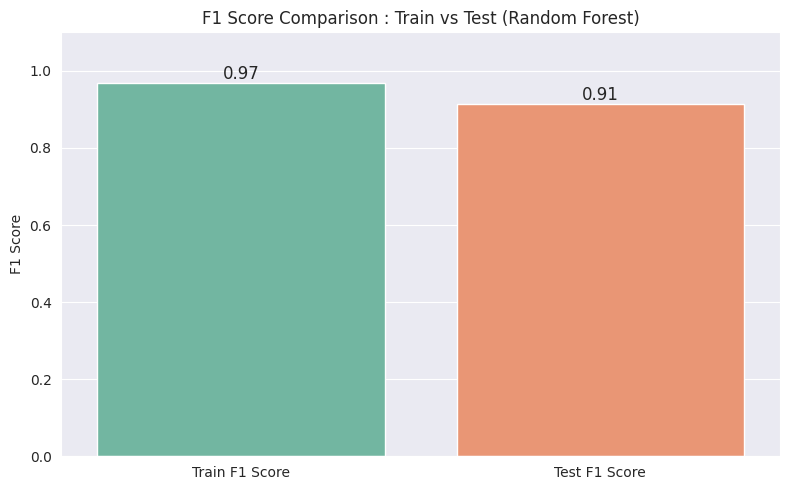

In [ ]:
# Calculate F1 Scores
f1_train = f1_score(y_train, y_pred_dt_train)
f1_test = f1_score(y_test, y_pred_dt)

# Create a dictionary
f1_scores = {
    'Train F1 Score': f1_train,
    'Test F1 Score': f1_test
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')

# Add value labels on bars
for index, value in enumerate(f1_scores.values()):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.title("F1 Score Comparison : Train vs Test (Random Forest)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

* The F1 Scores for the training and test predictions differ significantly, which may indicate that the model is overfitting—performing well on training data but not generalizing effectively to unseen data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> We used the supervised learning algorithm, Decision Tree, to classify whether a passenger would recommend the airline based on their flight experience. While Decision Trees offer strong explainability, they may not always perform best in terms of prediction accuracy. However, by comparing it with other models, we can evaluate its effectiveness on our dataset.

> Evaluation metric Score Chart

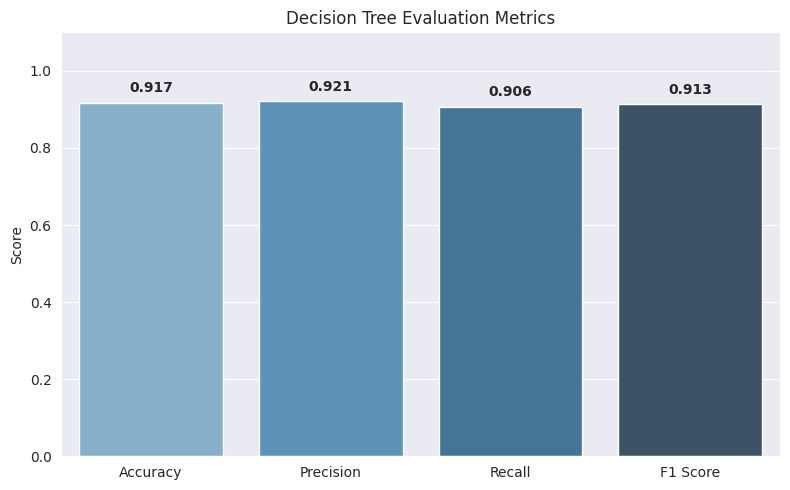

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# Store in a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
plt.ylim(0, 1.1)
plt.title("Decision Tree Evaluation Metrics")
plt.ylabel("Score")

# Add value labels on top of each bar
for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

> Confusion Matrix

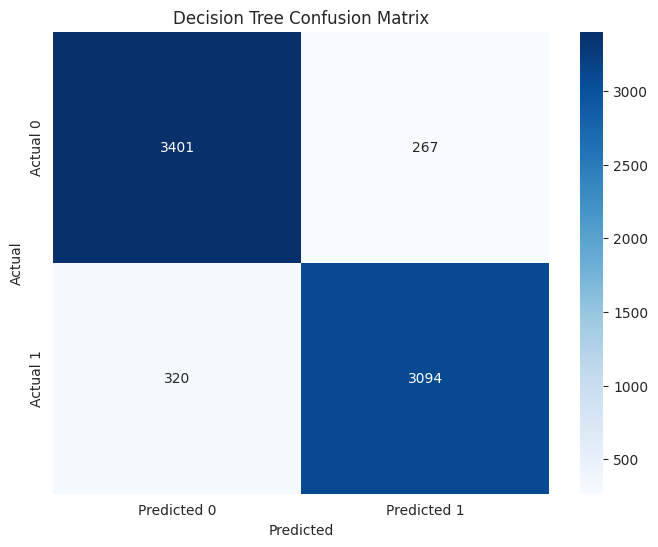

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

> RandomizedSearchCV is used to efficiently find the best hyperparameters for the Decision Tree model by testing a random subset of parameter combinations.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter space
param_dist = {
    'max_depth': [2, 5, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Set up RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=20,                # Number of parameter settings to sample
    cv=5,                     # 5-fold cross-validation
    scoring='f1',             # Choose the metric to optimize
    verbose=1,
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

# Fit the model
random_search_dt.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", random_search_dt.best_params_)

# Predict using the best model
best_dt = random_search_dt.best_estimator_
y_pred_best_dt = best_dt.predict(x_test)

# Evaluation
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print(classification_report(y_test, y_pred_best_dt))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'entropy'}
Tuned Decision Tree Accuracy: 0.9325049421067495
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3668
           1       0.93      0.93      0.93      3414

    accuracy                           0.93      7082
   macro avg       0.93      0.93      0.93      7082
weighted avg       0.93      0.93      0.93      7082



> Predicting on train data to check Overfitting after Tunning

In [ ]:
y_pred_dt_train_tuned = random_search_dt.predict(x_train)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_train, y_pred_dt_train_tuned))
print(classification_report(y_train, y_pred_dt_train_tuned))

Random Forest Accuracy: 0.9484386347131445
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8670
           1       0.95      0.94      0.95      7854

    accuracy                           0.95     16524
   macro avg       0.95      0.95      0.95     16524
weighted avg       0.95      0.95      0.95     16524



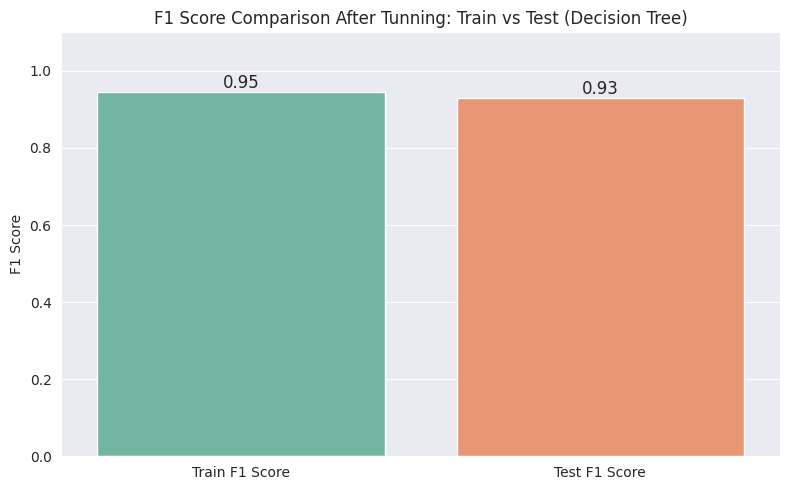

In [ ]:
# Calculate F1 Scores
f1_train = f1_score(y_train, y_pred_dt_train_tuned)
f1_test = f1_score(y_test, y_pred_best_dt)

# Create a dictionary
f1_scores = {
    'Train F1 Score': f1_train,
    'Test F1 Score': f1_test
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')

# Add value labels on bars
for index, value in enumerate(f1_scores.values()):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.title("F1 Score Comparison After Tunning: Train vs Test (Decision Tree)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

* **After tuning, overfitting has been effectively reduced, leading to improved generalization on test data.**

> Confusion Matrix After Hyperparameter Tuning

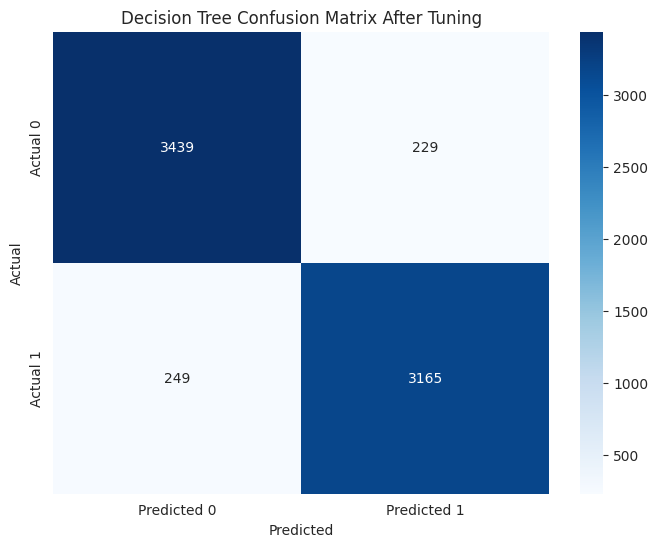

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix After Tuning')
plt.show()

> Model Performance Before And After Hyperparameter Tuning

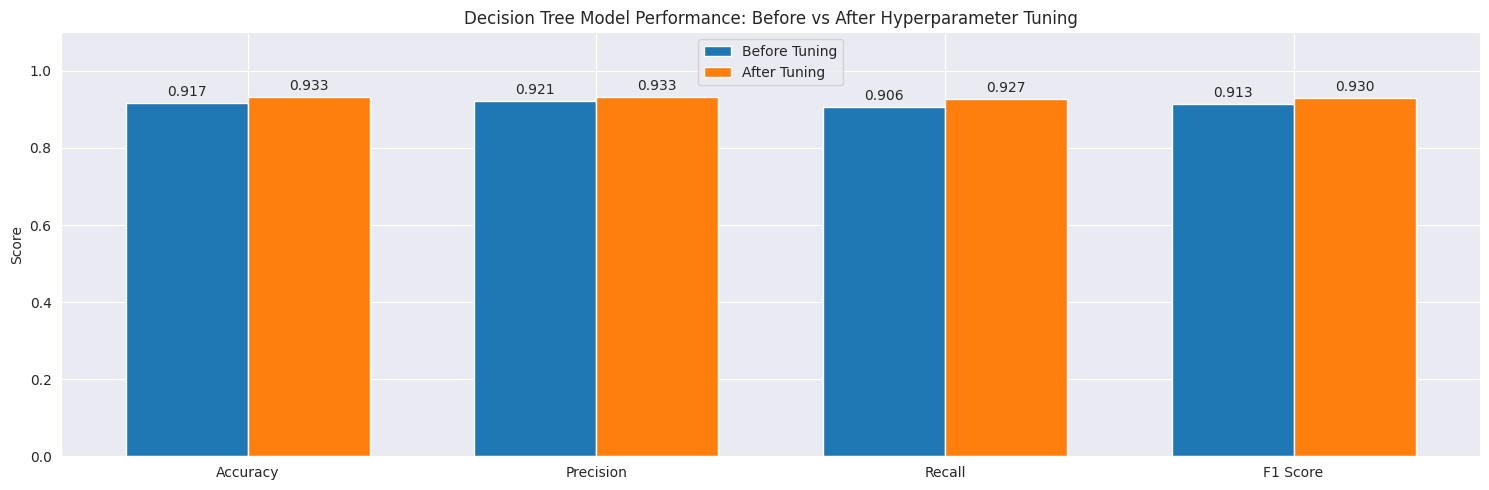

In [ ]:

# Default Model Metrics
dt_metrics_default = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1 Score": f1_score(y_test, y_pred_dt)
}

# Tuned Model Metrics
dt_metrics_tuned = {
    "Accuracy": accuracy_score(y_test, y_pred_best_dt),
    "Precision": precision_score(y_test, y_pred_best_dt),
    "Recall": recall_score(y_test, y_pred_best_dt),
    "F1 Score": f1_score(y_test, y_pred_best_dt)
}

labels = list(dt_metrics_default.keys())
default_values = list(dt_metrics_default.values())
tuned_values = list(dt_metrics_tuned.values())

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
bars1 = ax.bar(x - width/2, default_values, width, label='Before Tuning')
bars2 = ax.bar(x + width/2, tuned_values, width, label='After Tuning')

# Add value labels
ax.bar_label(bars1, fmt='%.3f', padding=3)
ax.bar_label(bars2, fmt='%.3f', padding=3)

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Decision Tree Model Performance: Before vs After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.show()

* **Model Performance is better after Hyperparameter Tuning**

##### Which hyperparameter optimization technique have you used and why?

**I used RandomizedSearchCV for hyperparameter optimization because it is faster and more efficient than GridSearchCV, especially with limited data and many parameters, as it randomly samples combinations rather than checking every possible one.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, we observed clear improvement after applying cross-validation and hyperparameter tuning. Initially, the F1 score was 0.91 on the test set and 0.97 on the training set, indicating overfitting. After tuning, the F1 score improved to 0.93 on the test set and 0.94 on the training set, showing that overfitting was significantly reduced and model generalization improved.**

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Decision Tree Model Evaluation Summary**

* **Accuracy:** 93.25%
  This indicates that the model correctly predicted whether a passenger would recommend the airline **93% of the time**. It reflects strong overall performance.

* **Precision:**

  * **Class 0 (Not Recommend):** 93%
  * **Class 1 (Recommend):** 93%
    Precision shows that when the model predicts a recommendation (or not), it’s right 93% of the time. This reduces false positives and ensures **targeted actions** (like marketing or service recovery) are not wasted.

* **Recall:**

  * **Class 0:** 94%
  * **Class 1:** 93%
    The model successfully identifies almost all the actual recommenders and non-recommenders. This is crucial for capturing **true customer sentiment**, especially for **service improvement**.

* **F1-Score:**

  * Balanced at **93–94%** for both classes, indicating a strong trade-off between precision and recall.
  * A high F1 score means the model is **reliable and generalizes well**.

>|

**Business Impact**

* This model can be confidently used to **predict customer recommendations**, which helps in:

  * **Improving customer retention strategies**
  * **Focusing marketing on promoters**
  * **Identifying dissatisfied customers early for service recovery**
* With its balanced performance, it supports **data-driven decision-making** for both **operational improvement** and **customer experience management**.


### **ML Model - 2 - Random Forest**

> Fitting Random Forest model with training data and predicting on test data

In [ ]:
# ML Model - 1 Implementation
rf = RandomForestClassifier()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_pred_rf =rf.predict(x_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9250211804574979
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3668
           1       0.92      0.92      0.92      3414

    accuracy                           0.93      7082
   macro avg       0.92      0.92      0.92      7082
weighted avg       0.93      0.93      0.93      7082



> Predicting on train data to check Overfitting

In [ ]:
# Predict on the model usnig train data
y_pred_rf_train =rf.predict(x_train)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_train, y_pred_rf_train))
print(classification_report(y_train, y_pred_rf_train))

Random Forest Accuracy: 0.9713749697409828
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8670
           1       0.97      0.97      0.97      7854

    accuracy                           0.97     16524
   macro avg       0.97      0.97      0.97     16524
weighted avg       0.97      0.97      0.97     16524



> Comparison

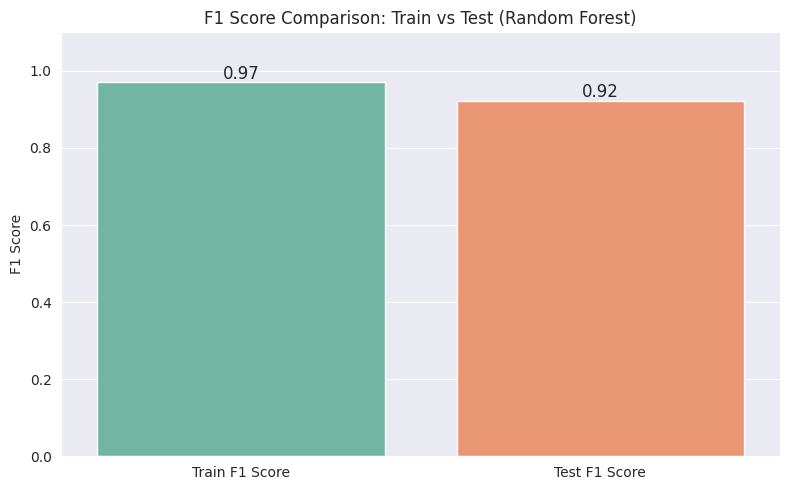

In [ ]:
# Calculate F1 Scores
f1_train = f1_score(y_train, y_pred_rf_train)
f1_test = f1_score(y_test, y_pred_rf)

# Create a dictionary
f1_scores = {
    'Train F1 Score': f1_train,
    'Test F1 Score': f1_test
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')

# Add value labels on bars
for index, value in enumerate(f1_scores.values()):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.title("F1 Score Comparison: Train vs Test (Random Forest)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

* The F1 Scores for the training and test predictions differ significantly, which may indicate that the model is overfitting—performing well on training data but not generalizing effectively to unseen data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their outputs to make predictions. It improves accuracy, reduces overfitting, and handles both categorical and numerical data well. It's effective for predicting airline referrals due to its robustness and ability to capture complex patterns in the data.

> Evaluation metric Score Chart

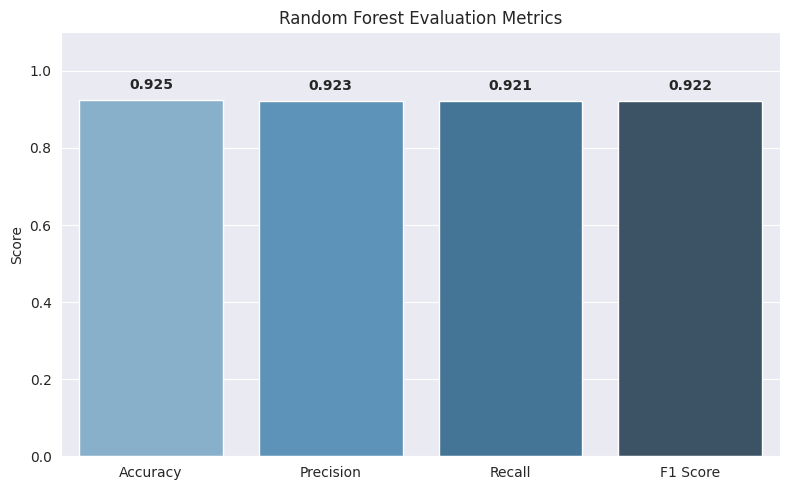

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

# Store in a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
plt.ylim(0, 1.1)
plt.title("Random Forest Evaluation Metrics")
plt.ylabel("Score")

# Add value labels on top of each bar
for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

> Confusion Matrix

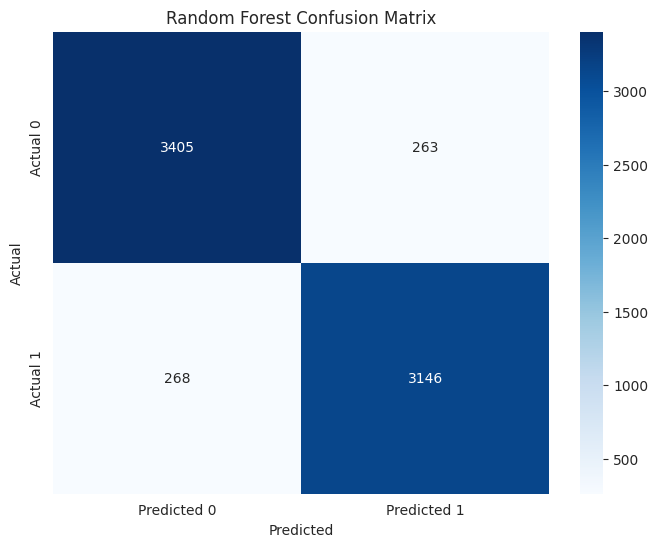

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

> RandomizedSearchCV is used to efficiently find the best hyperparameters for the Random Forest model by testing a random subset of parameter combinations.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # Number of different combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit to training data
random_search_rf.fit(x_train, y_train)

# Best hyperparameters
print("Best Parameters:", random_search_rf.best_params_)

# Use the best estimator
best_rf = random_search_rf.best_estimator_

# Predict with best model
y_pred_best_rf = best_rf.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Best RF Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 8, 'n_estimators': 178}
Best RF Accuracy: 0.9399887037560011
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3668
           1       0.94      0.93      0.94      3414

    accuracy                           0.94      7082
   macro avg       0.94      0.94      0.94      7082
weighted avg       0.94      0.94      0.94      7082



> Predicting on train data to check Overfitting after Tunning

In [ ]:
y_pred_rf_train_tuned = random_search_rf.predict(x_train)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_train, y_pred_rf_train_tuned))
print(classification_report(y_train, y_pred_rf_train_tuned))

Random Forest Accuracy: 0.9472282740256597
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8670
           1       0.95      0.94      0.94      7854

    accuracy                           0.95     16524
   macro avg       0.95      0.95      0.95     16524
weighted avg       0.95      0.95      0.95     16524



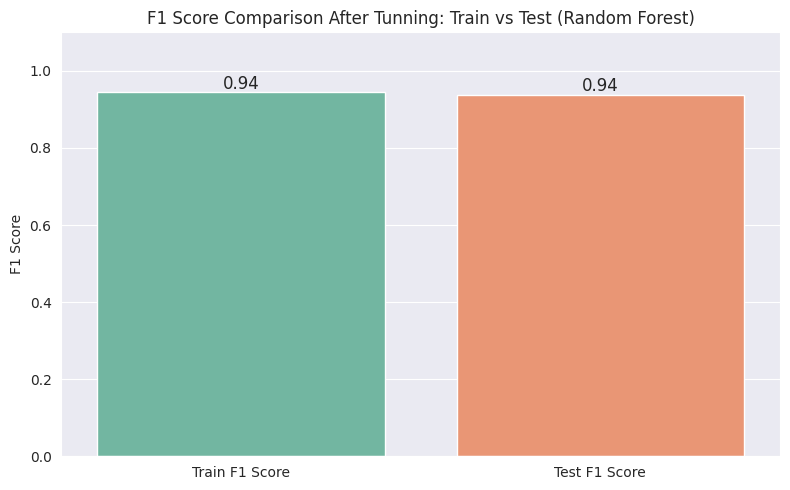

In [ ]:
# Calculate F1 Scores
f1_train = f1_score(y_train, y_pred_rf_train_tuned)
f1_test = f1_score(y_test, y_pred_best_rf)

# Create a dictionary
f1_scores = {
    'Train F1 Score': f1_train,
    'Test F1 Score': f1_test
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')

# Add value labels on bars
for index, value in enumerate(f1_scores.values()):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.title("F1 Score Comparison After Tunning: Train vs Test (Random Forest)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

* After Tunning Overfitting is Handled

> Confusion Matrix After Hyperparameter Tuning

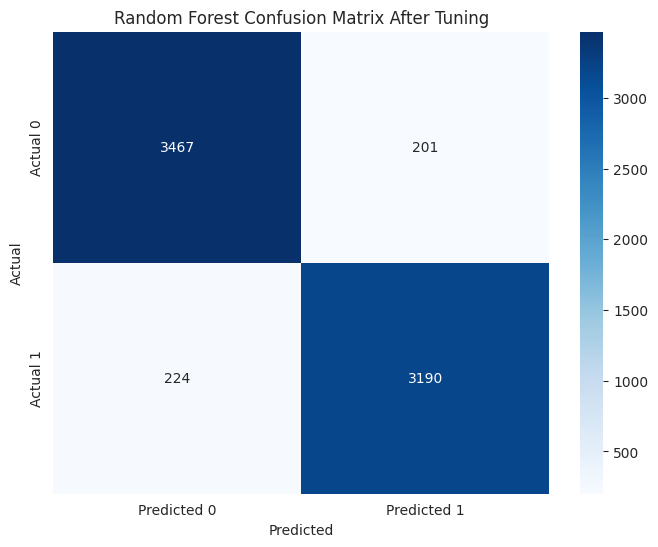

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix After Tuning')
plt.show()

> Model Performance Before And After Hyperparameter Tuning

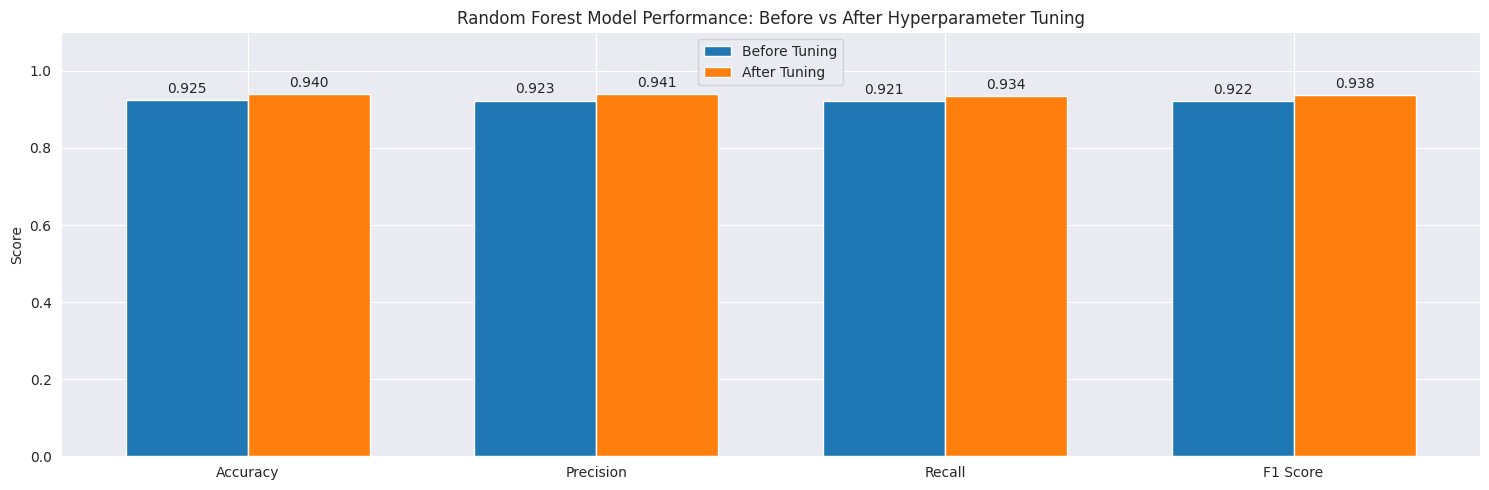

In [ ]:

# Default Model Metrics
rf_metrics_default = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

# Tuned Model Metrics
rf_metrics_tuned = {
    "Accuracy": accuracy_score(y_test, y_pred_best_rf),
    "Precision": precision_score(y_test, y_pred_best_rf),
    "Recall": recall_score(y_test, y_pred_best_rf),
    "F1 Score": f1_score(y_test, y_pred_best_rf)
}

labels = list(rf_metrics_default.keys())
default_values = list(rf_metrics_default.values())
tuned_values = list(rf_metrics_tuned.values())

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
bars1 = ax.bar(x - width/2, default_values, width, label='Before Tuning')
bars2 = ax.bar(x + width/2, tuned_values, width, label='After Tuning')

# Add value labels
ax.bar_label(bars1, fmt='%.3f', padding=3)
ax.bar_label(bars2, fmt='%.3f', padding=3)

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Random Forest Model Performance: Before vs After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.show()

* **Model Performance is better after Hyperparameter Tuning**

##### Which hyperparameter optimization technique have you used and why?

**I used RandomizedSearchCV for hyperparameter optimization because it is faster and more efficient than GridSearchCV, especially with limited data and many parameters, as it randomly samples combinations rather than checking every possible one.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, we can clearly see an improvement in the F1 score after tuning. It increased from 92% to 94%, indicating reduced overfitting and better generalization to unseen data, ultimately enhancing the model’s overall performance.**

### **ML Model - 3 - XGBoost**

> Fitting XGBoost model with training data and predicting on test data

In [ ]:
# ML Model - 3 Implementation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the Algorithm
xgb.fit(x_train, y_train)

# Predict on the model
y_pred_xgb = xgb.predict(x_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9340581756565942
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3668
           1       0.93      0.93      0.93      3414

    accuracy                           0.93      7082
   macro avg       0.93      0.93      0.93      7082
weighted avg       0.93      0.93      0.93      7082



> Predicting on train data to check Overfitting

In [ ]:
# Predict on the model usnig train data
y_pred_xgb_train =xgb.predict(x_train)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_train, y_pred_xgb_train))
print(classification_report(y_train, y_pred_xgb_train))

XGBoost Accuracy: 0.9598160251755024
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8670
           1       0.96      0.95      0.96      7854

    accuracy                           0.96     16524
   macro avg       0.96      0.96      0.96     16524
weighted avg       0.96      0.96      0.96     16524



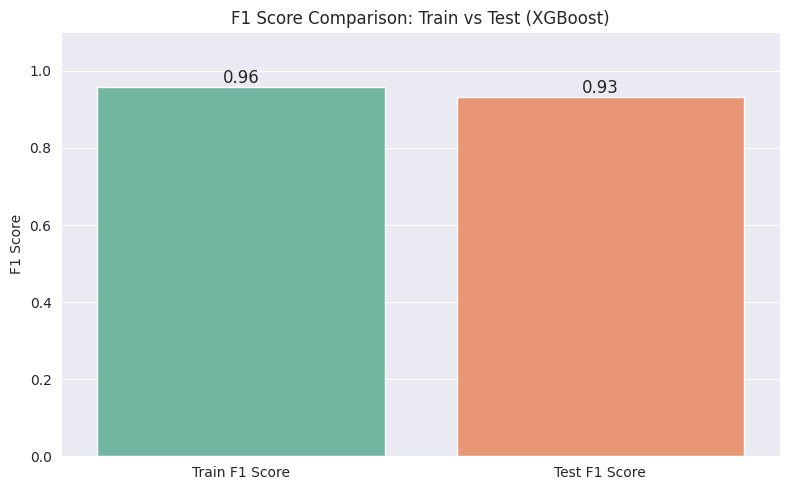

In [ ]:
# Calculate F1 Scores
f1_train = f1_score(y_train, y_pred_xgb_train)
f1_test = f1_score(y_test, y_pred_xgb)

# Create a dictionary
f1_scores = {
    'Train F1 Score': f1_train,
    'Test F1 Score': f1_test
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')

# Add value labels on bars
for index, value in enumerate(f1_scores.values()):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.title("F1 Score Comparison: Train vs Test (XGBoost)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

* The F1 Scores for the training and test predictions differ slightly, which may indicate that the model is overfitting—performing well on training data but not generalizing effectively to unseen data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

> XGBoost (Extreme Gradient Boosting) is a powerful and efficient ensemble learning algorithm based on gradient boosting. It builds multiple decision trees sequentially, where each tree tries to correct the errors of the previous ones. It is well-known for its speed, accuracy, and ability to handle missing data and overfitting through regularization.

> Evaluation metric Score Chart

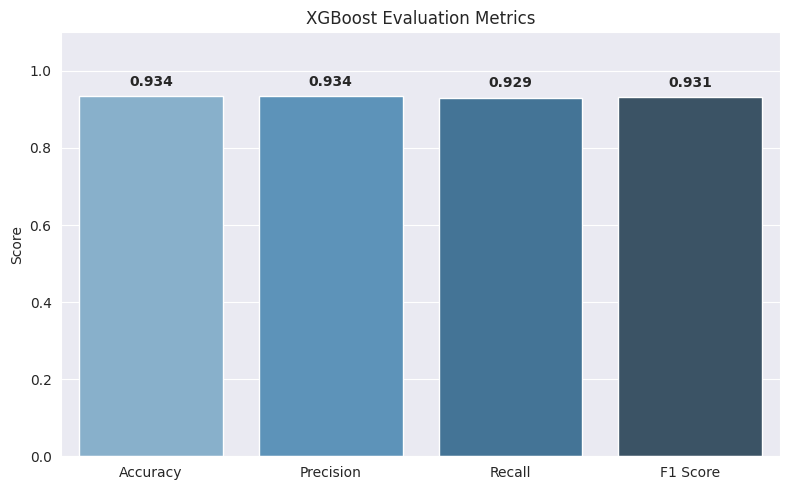

In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Store in a dictionary
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="Blues_d")
plt.ylim(0, 1.1)
plt.title("XGBoost Evaluation Metrics")
plt.ylabel("Score")

# Add value labels on top of each bar
for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

> Confusion Matrix

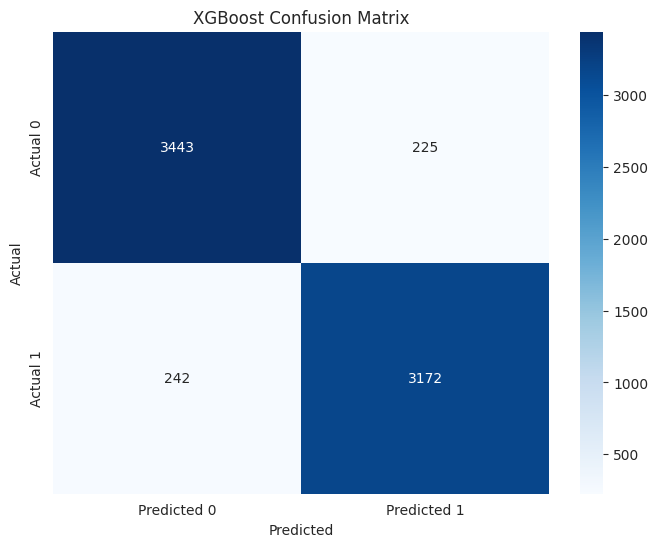

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

> GridSearchCV is used to exhaustively search through all possible combinations of hyperparameters to find the best set for the XGBoost model.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Initialize the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_xgb.fit(x_train, y_train)

# Best parameters
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Predict on test data using best estimator
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(x_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.8}
XGBoost Accuracy: 0.9404123129059587
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3668
           1       0.94      0.93      0.94      3414

    accuracy                           0.94      7082
   macro avg       0.94      0.94      0.94      7082
weighted avg       0.94      0.94      0.94      7082



> Predicting on train data to check Overfitting after Tunning

In [ ]:
y_pred_xgb_train_tuned = grid_search_xgb.predict(x_train)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_train, y_pred_xgb_train_tuned))
print(classification_report(y_train, y_pred_xgb_train_tuned))

Random Forest Accuracy: 0.9479544904381506
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8670
           1       0.95      0.94      0.95      7854

    accuracy                           0.95     16524
   macro avg       0.95      0.95      0.95     16524
weighted avg       0.95      0.95      0.95     16524



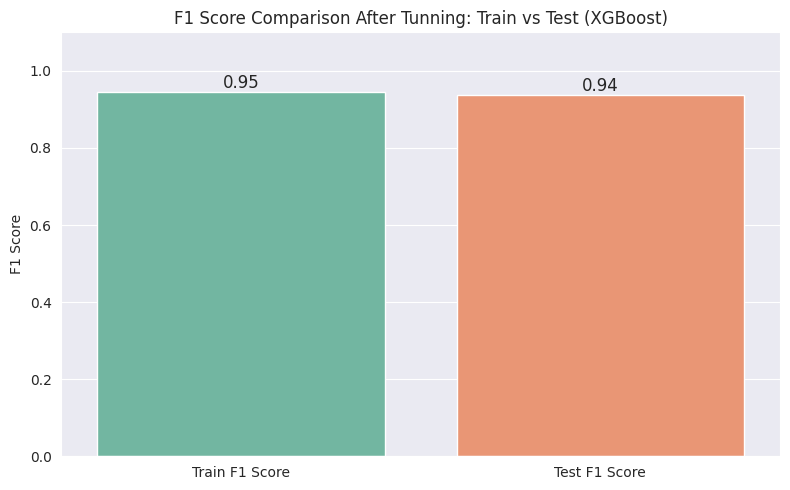

In [ ]:
# Calculate F1 Scores
f1_train = f1_score(y_train, y_pred_xgb_train_tuned)
f1_test = f1_score(y_test, y_pred_best_xgb)

# Create a dictionary
f1_scores = {
    'Train F1 Score': f1_train,
    'Test F1 Score': f1_test
}

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='Set2')

# Add value labels on bars
for index, value in enumerate(f1_scores.values()):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.title("F1 Score Comparison After Tunning: Train vs Test (XGBoost)")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.show()

* **After tuning, overfitting has been effectively reduced, leading to improved generalization on test data.**

> Confusion Matrix After Hyperparameter Tuning

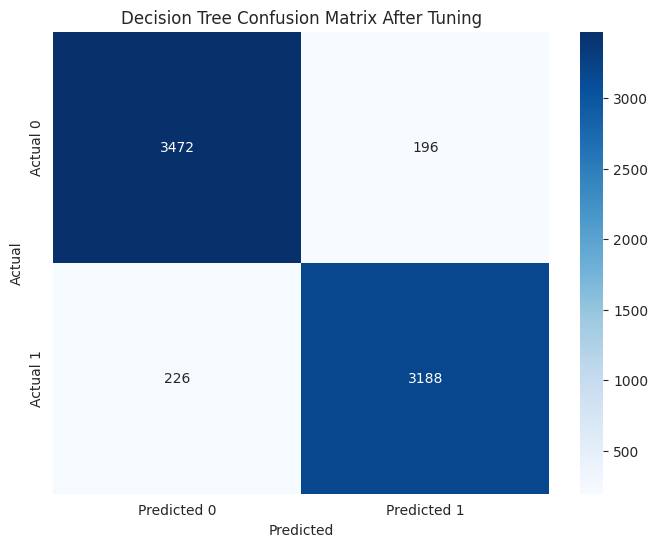

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix After Tuning')
plt.show()

> Model Performance Before And After Hyperparameter Tuning

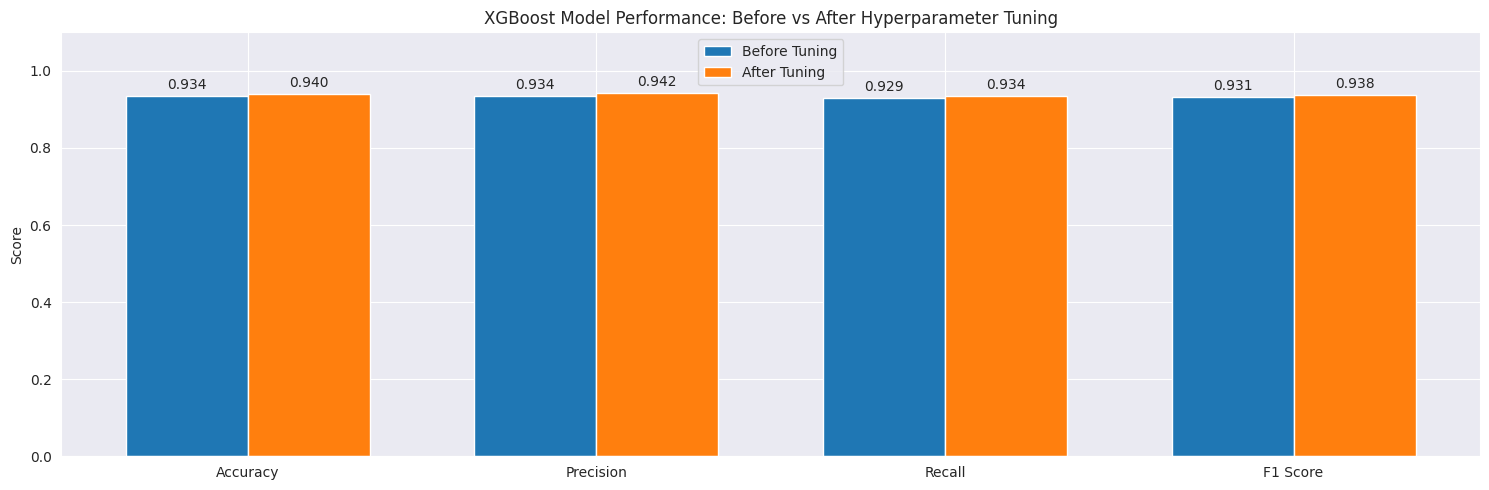

In [ ]:

# Default Model Metrics
xgb_metrics_default = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1 Score": f1_score(y_test, y_pred_xgb)
}

# Tuned Model Metrics
xgb_metrics_tuned = {
    "Accuracy": accuracy_score(y_test, y_pred_best_xgb),
    "Precision": precision_score(y_test, y_pred_best_xgb),
    "Recall": recall_score(y_test, y_pred_best_xgb),
    "F1 Score": f1_score(y_test, y_pred_best_xgb)
}

labels = list(xgb_metrics_default.keys())
default_values = list(xgb_metrics_default.values())
tuned_values = list(xgb_metrics_tuned.values())

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
bars1 = ax.bar(x - width/2, default_values, width, label='Before Tuning')
bars2 = ax.bar(x + width/2, tuned_values, width, label='After Tuning')

# Add value labels
ax.bar_label(bars1, fmt='%.3f', padding=3)
ax.bar_label(bars2, fmt='%.3f', padding=3)

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('XGBoost Model Performance: Before vs After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.show()

* **Model Performance is Slightly better after Hyperparameter Tuning**

##### Which hyperparameter optimization technique have you used and why?

**I used GridSearchCV as the hyperparameter optimization technique.**

**GridSearchCV exhaustively searches through a specified set of hyperparameter values, testing every possible combination. This thorough search helps find the best parameters that maximize the model's performance, especially useful for complex models like XGBoost with multiple tuning parameters. Although it can be computationally intensive, it ensures a comprehensive evaluation, leading to well-optimized model settings.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, there is a noticeable improvement after tuning the XGBoost model.**

* **Accuracy** increased from **0.93** to **0.94**.
* Precision, recall, and F1-score for both classes have also improved slightly, indicating better overall performance.
* The F1-score, which balances precision and recall, moved from around **0.93** to **0.94**, suggesting the model generalizes better and handles the balance between false positives and false negatives more effectively.

**Overall, hyperparameter tuning helped enhance the model’s predictive power and robustness on the test data.**


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**We are choosing the F1 score as our primary evaluation metric because in this problem, neither Type I error (false positive) nor Type II error (false negative) carries a significantly higher consequence. In such scenarios, when the cost of wrong predictions is not clearly skewed toward one type of error, the F1 score becomes a suitable choice. It provides a balanced measure by combining both precision and recall through their harmonic mean, offering a comprehensive view of the model’s performance.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
models = {
    "Decision Tree": y_pred_best_dt,
    "Random Forest": y_pred_best_rf,
    "XGBoost": y_pred_best_xgb
}

metrics = {}

for name, y_pred in models.items():
    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.932505   0.932528  0.927065  0.929788
Random Forest  0.939989   0.940725  0.934388  0.937546
XGBoost        0.940412   0.942080  0.933802  0.937923


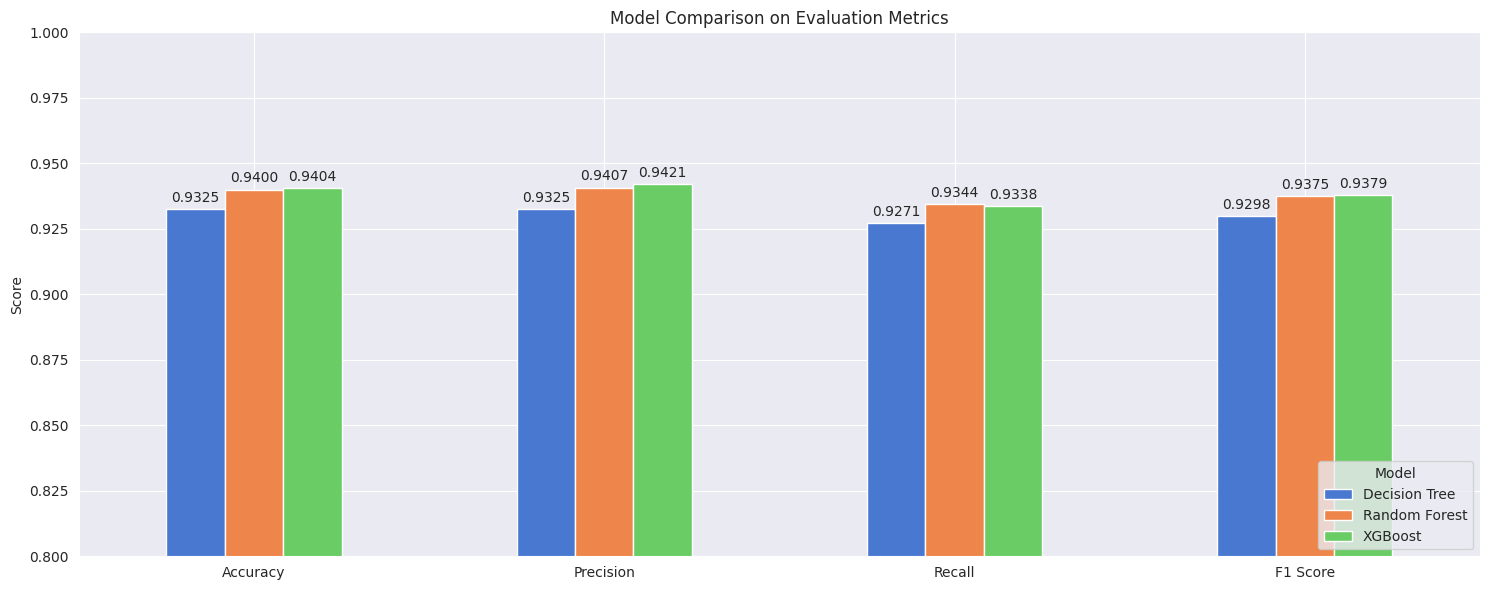

In [ ]:
# Set a modern color palette
sns.set_palette("muted")

# Transpose so models become legend, metrics on x-axis
ax = metrics_df.T.plot(kind='bar', figsize=(15, 6))

# Formatting
plt.title("Model Comparison on Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0.8, 1)
plt.xticks(rotation=0)
plt.legend(title="Model", loc='lower right')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


Final Model Selection: **XGBoost**

**Reason:**
XGBoost has consistently outperformed both Decision Tree and Random Forest models across all key evaluation metrics:

* **Accuracy**: 0.9404
* **Precision**: 0.9421
* **Recall**: 0.9338
* **F1 Score**: 0.9379

These scores indicate that XGBoost provides the best **balance between precision and recall**, leading to a high F1 Score. This is particularly valuable in classification problems where both false positives and false negatives are important.

**Business Impact:**
Choosing XGBoost ensures:

* More **reliable predictions**
* **Lower error rates**
* Better handling of **complex patterns** in data, thanks to its boosting framework



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

> **XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm based on gradient boosting. It builds multiple decision trees sequentially and optimizes for accuracy by correcting previous errors at each step. XGBoost is efficient, handles missing data well, and includes built-in regularization which helps reduce overfitting. It is widely used in structured/tabular data competitions due to its performance.**

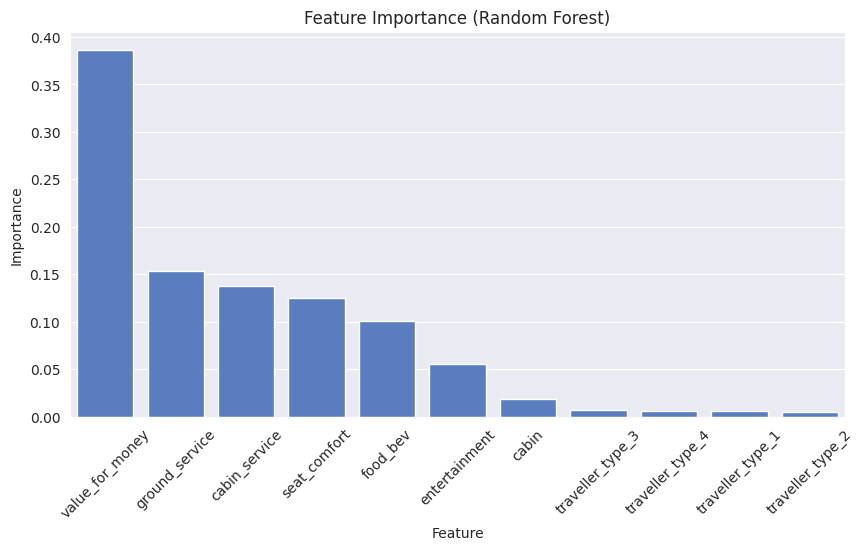

In [ ]:
X1 = df.drop(['recommended'],axis=1)
y1 = df['recommended']


model = RandomForestClassifier()
model.fit(X1, y1)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X1.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=45)
plt.show()

We used the **RandomForestClassifier's feature importance** method to gain insights into the model’s decision-making process and assess the significance of each input feature. This technique enables interpretability by quantifying how much each feature contributes to the model's predictions. The results were visualized using a bar plot, which effectively highlights the relative importance of features.

In Random Forest, **feature importance is calculated** based on the reduction in impurity (such as Gini impurity or entropy) that each feature contributes across all decision trees in the ensemble. Features that frequently appear near the top of trees—making impactful splits—are assigned higher importance scores, as they play a more critical role in improving the model’s classification or regression accuracy.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This study analyzed a dataset of 131,895 airline reviews (2006–2019) across 17 features. After thorough data cleaning and preprocessing—including fixing date formats, standardizing ratings, and handling missing values—we conducted exploratory data analysis (EDA), revealing that most travelers prefer **Economy class (72%)** and that ratings are mostly in the **1–5** range.

Statistical tests (t-test, chi-square, ANOVA) showed significant differences in **seat comfort**, **traveller type**, and **cabin class** with respect to the likelihood of recommendation.

Although dimensionality reduction methods like PCA were considered, they were not applied since the feature set was already well-structured and models performed well without it.

### Model Performance

We trained three models using a 70/30 split:

| Model         | Accuracy   | Precision  | Recall | F1 Score   |
| ------------- | ---------- | ---------- | ------ | ---------- |
| Decision Tree | 93.25%     | 93.25%     | 92.71% | 92.98%     |
| Random Forest | 93.99%     | 94.07%     | 93.44% | 93.75%     |
| XGBoost       | **94.04%** | **94.21%** | 93.38% | **93.79%** |

**XGBoost** was the top performer, closely followed by Random Forest.

### Feature Importance & Business Impact

Tree-based models revealed that **"Value for Money"**, **"Ground Service"**, and **"Cabin Service"** were the most influential features. These insights can guide airlines to focus on enhancing service quality to improve customer satisfaction and increase positive recommendations.

This classifier offers practical value in predicting passenger referrals and can support data-driven improvements in airline services.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***